# The Smith Parasite - MACHINE LEARNING 2022/2023 - Group 19

#### 20210669 Bruna Duarte
#### 20220617 Nichita Zamisnii
#### 20220620 Ianis Rusitoru
#### 20220723 Johnas 

# Data import, Descriptives

__`Step 1`__ Import the neccesary libraries

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

__`Step 2`__ Read in the data

In [2]:
# Import the data

# this is the *test() data maybe not useful at this point
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')

# this is the *train* data
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

In [3]:
# merge training data
test_data = test_health.merge(test_habits, on='PatientID')
test_data = test_data.merge(test_demo, on='PatientID')
#train_data.set_index('PatientID', inplace = True)

# drop name and Patient ID as it is not neccesary anymore
test_data.drop(['Name'],axis=1, inplace = True)
test_data.drop(['PatientID'],axis=1, inplace = True)

__`Step 3`__ Given the fact that the dataset is split in 3 files we decided to merge them togheter using the common attribute ''PatientID'' and set it as index

In [4]:
# merge training data
train_data = train_health.merge(train_habits, on='PatientID')
train_data = train_data.merge(train_demo, on='PatientID')
#train_data.set_index('PatientID', inplace = True)



In [5]:
# drop name and Patient ID as it is not neccesary anymore
train_data.drop(['Name'],axis=1, inplace = True)
train_data.drop(['PatientID'],axis=1, inplace = True)
train_data.head()

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Birth_Year,Region,Education,Disease
0,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,1965,London,High School Incomplete (10th to 11th grade),1
1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,1969,South West,High School Incomplete (10th to 11th grade),1
2,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
3,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1958,London,University Complete (3 or more years),0
4,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,1968,South East,University Incomplete (1 to 2 years),1


__`Step 4`__ Check the variable datatypes

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Height            800 non-null    int64 
 1   Weight            800 non-null    int64 
 2   High_Cholesterol  800 non-null    int64 
 3   Blood_Pressure    800 non-null    int64 
 4   Mental_Health     800 non-null    int64 
 5   Physical_Health   800 non-null    int64 
 6   Checkup           800 non-null    object
 7   Diabetes          800 non-null    object
 8   Smoking_Habit     800 non-null    object
 9   Drinking_Habit    800 non-null    object
 10  Exercise          800 non-null    object
 11  Fruit_Habit       800 non-null    object
 12  Water_Habit       800 non-null    object
 13  Birth_Year        800 non-null    int64 
 14  Region            800 non-null    object
 15  Education         787 non-null    object
 16  Disease           800 non-null    int64 
dtypes: int64(8), obj

__`Step 5`__ Check if missing values exist

In [7]:
train_data.isna().sum()

Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Birth_Year           0
Region               0
Education           13
Disease              0
dtype: int64

__`Step 6`__ Assign target variable to an array

In [8]:
target = train_data['Disease']
target

0      1
1      1
2      1
3      0
4      1
      ..
795    0
796    1
797    0
798    1
799    0
Name: Disease, Length: 800, dtype: int64

__`Step 7`__ Drop target variable from dataset 

In [9]:
train_data.drop(['Disease'], inplace=True, axis = 1)
train_data.head()


,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Birth_Year,Region,Education
0,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,1965,London,High School Incomplete (10th to 11th grade)
1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,1969,South West,High School Incomplete (10th to 11th grade)
2,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade)
3,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1958,London,University Complete (3 or more years)
4,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,1968,South East,University Incomplete (1 to 2 years)


__`Step 8`__ Define metric and non-metric features for future use

In [10]:
non_metric_features = ["Education", "Checkup", "Diabetes", "Fruit_Habit","Region", "Drinking_Habit", "Water_Habit", "Smoking_Habit" , "Exercise"]
metric_features = train_data.columns.drop(non_metric_features).to_list()
print('\n',"Non-metric:",non_metric_features,'\n')
print('\n',"Metric:",metric_features,'\n')


 Non-metric: ['Education', 'Checkup', 'Diabetes', 'Fruit_Habit', 'Region', 'Drinking_Habit', 'Water_Habit', 'Smoking_Habit', 'Exercise'] 


 Metric: ['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Birth_Year'] 



__`Step 9`__ Check if categorical data has no input errors

In [11]:
#for metric in non_metric_features:
 #   print('\n',metric,'\n',train_data[metric].value_counts())

__`Step 10`__ Check number of duplicates <br> In this case we have **none**

In [12]:
len(train_data)-len(train_data.drop_duplicates())

0

In [13]:
# convert birth year to age
#train_data['Birth_Year'] = datetime.now().year - train_data['Birth_Year']
#train_data.rename(columns = {'Birth_Year':'Age in 2022'}, inplace = True)
#train_data.head()

__`Step 13`__ Perform the train-test split


In [14]:
X_train, X_val, y_train, y_val = train_test_split(train_data,target, test_size = 0.26, stratify = target, shuffle = True, random_state = 0)

In [15]:
#X_train.set_index('PatientID', inplace = True)
#X_val.set_index('PatientID', inplace = True)

In [16]:
X_train.isna().sum()

Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Birth_Year          0
Region              0
Education           9
dtype: int64

# Data Exploration Phase
The data exploration phase is done only on the **training data**

__`Step 14`__ Look for correlation between variables

NameError: name 'fp' is not defined

In [18]:
cormat

NameError: name 'cormat' is not defined

__`Step 15`__ Plot the pairplots to see the spreads

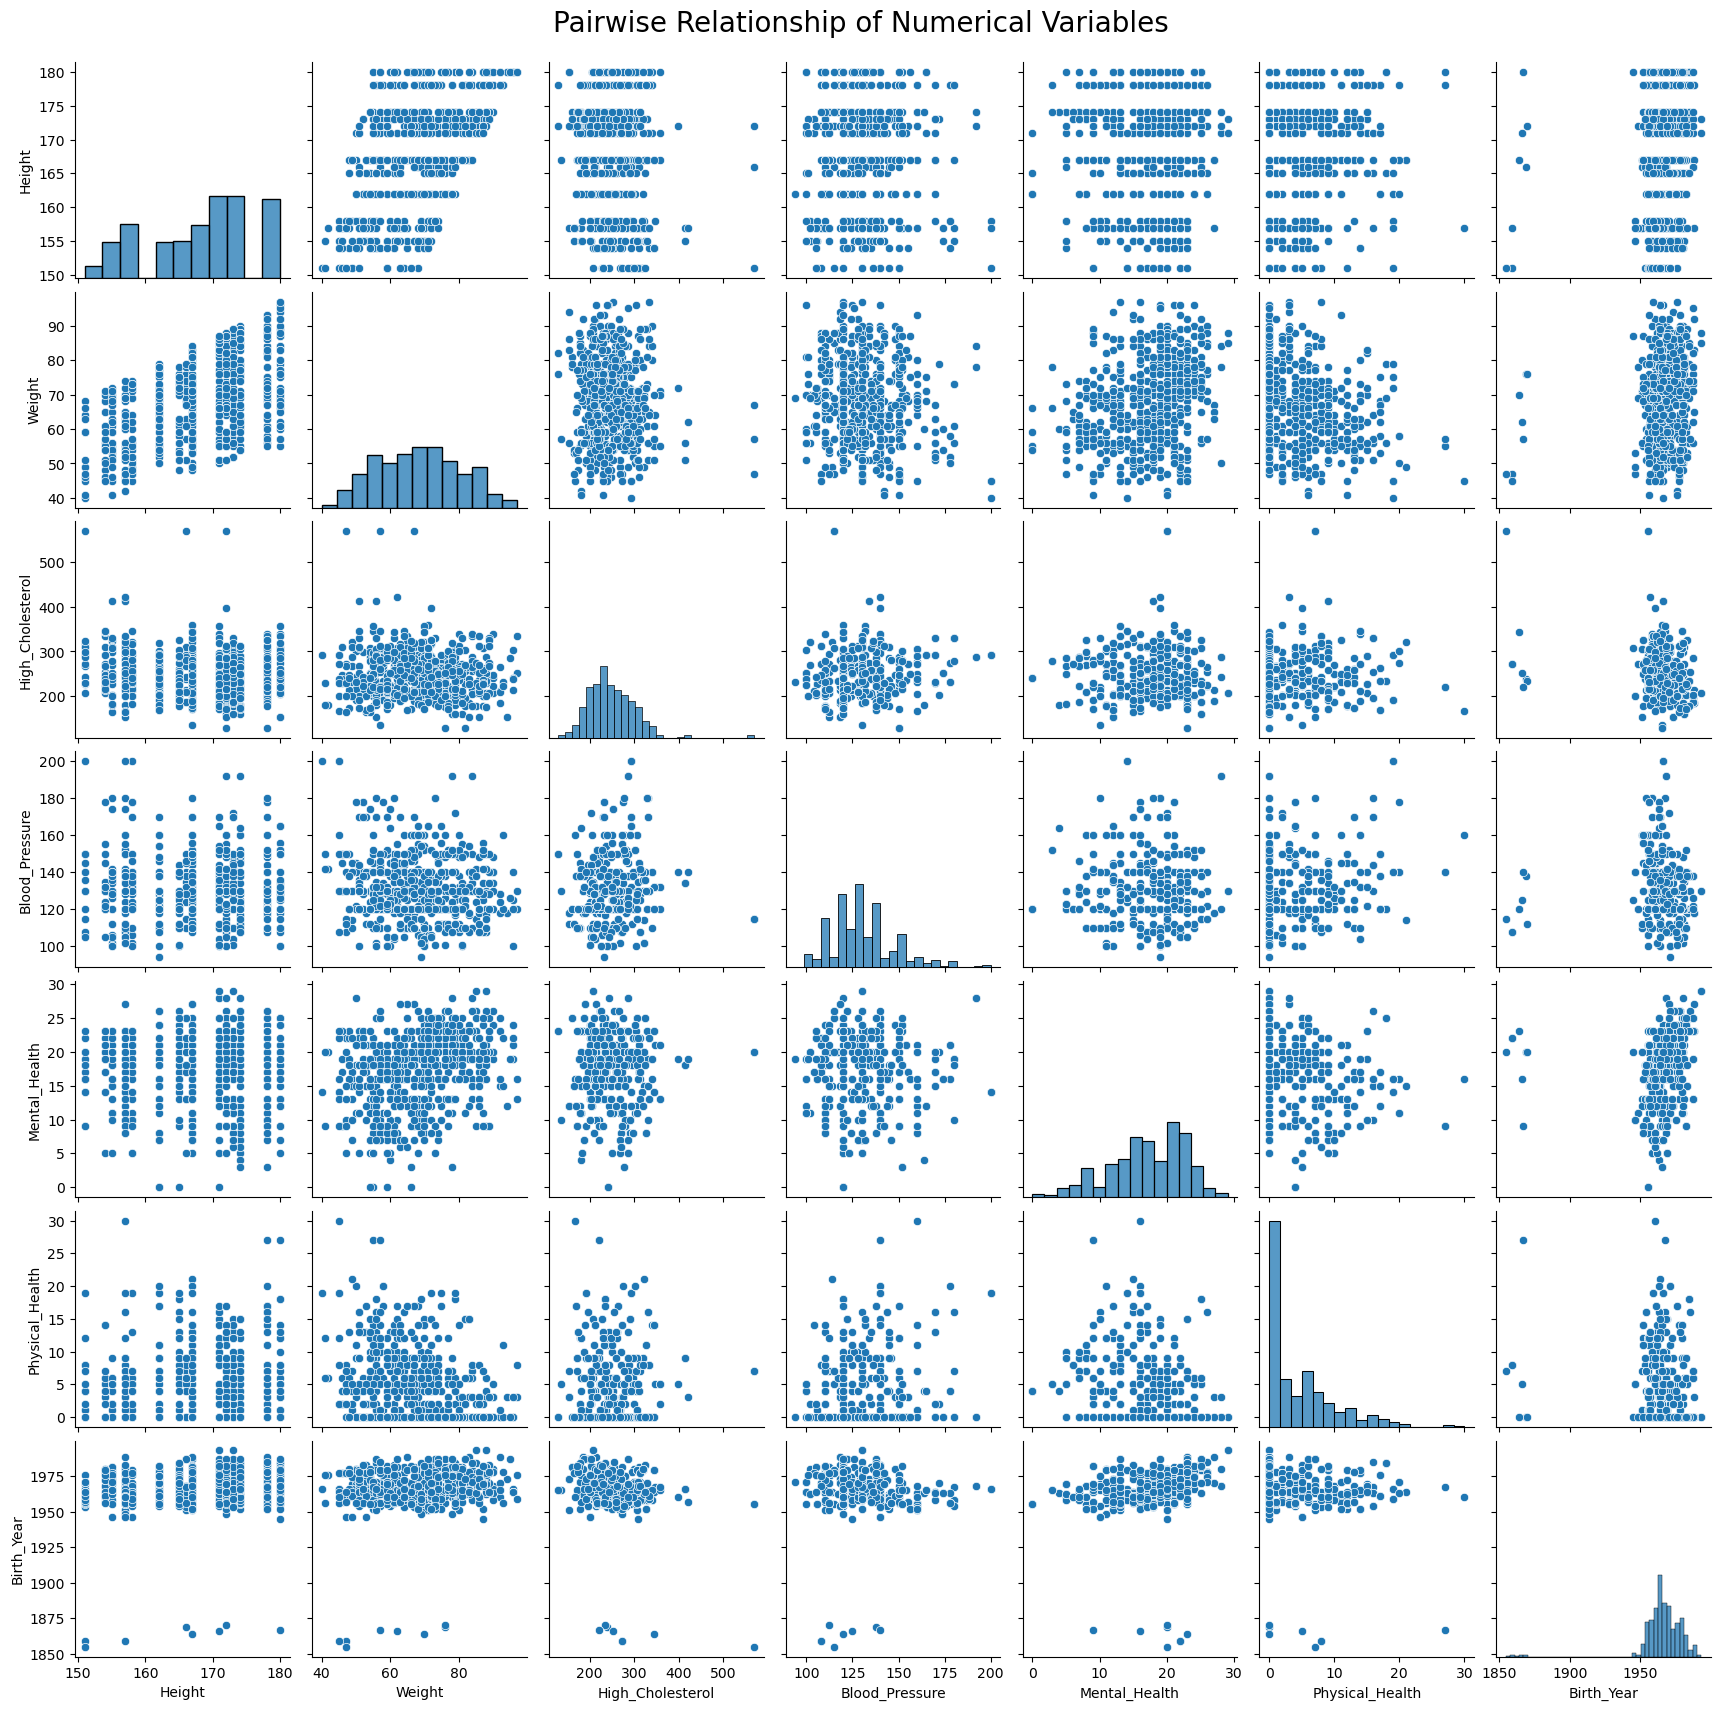

In [19]:
# Setting pairplot
sns.pairplot(X_train[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

__`Step 16`__ Plot histograms on numericals

### Label Encode just for the non-metric. It is disabled because we already saw the results and we found out which features to use

X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('More than six pieces of fruit', 5)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('5 to 6 pieces of fruit in average', 4)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('3 to 4 pieces of fruit in average', 3)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('1 to 2 pieces of fruit in average', 2)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('Less than 1. I do not consume fruits every day.', 1)

X_train['Diabetes'] = X_train['Diabetes'].replace('Neither I nor my immediate family have diabetes.', 1)
X_train['Diabetes'] = X_train['Diabetes'].replace("I don't have diabetes, but I have direct family members who have diabetes.", 2)
X_train['Diabetes'] = X_train['Diabetes'].replace('I have/had pregnancy diabetes or borderline diabetes', 3)
X_train['Diabetes'] = X_train['Diabetes'].replace('I do have diabetes', 4)

X_train['Checkup'] = X_train['Checkup'].replace('Less than three months', 1)
X_train['Checkup'] = X_train['Checkup'].replace('Less than 3 years but more than 1 year', 2)
X_train['Checkup'] = X_train['Checkup'].replace('More than 3 years', 3)
X_train['Checkup'] = X_train['Checkup'].replace('Not sure', 4)

X_train['Drinking_Habit'] = X_train['Checkup'].replace('I do not consume any type of alcohol', 1)
X_train['Drinking_Habit'] = X_train['Checkup'].replace('I consider myself a social drinker', 2)
X_train['Drinking_Habit'] = X_train['Checkup'].replace('I usually consume alcohol every day', 3)

X_train['Exercise'] = X_train['Exercise'].replace('Yes', 1)
X_train['Exercise'] = X_train['Exercise'].replace('No', 2)
                                                  
X_train['Education'] = X_train['Education'].replace('University Complete (3 or more years)', 6)
X_train['Education'] = X_train['Education'].replace('University Incomplete (1 to 2 years)', 5)
X_train['Education'] = X_train['Education'].replace('High School Graduate', 4)
X_train['Education'] = X_train['Education'].replace('High School Incomplete (10th to 11th grade)', 3)
X_train['Education'] = X_train['Education'].replace('Elementary School (1st to 9th grade)', 2)
X_train['Education'] = X_train['Education'].replace('I never attended school / Other', 1)

                                              
X_train['Region'] = X_train['Region'].replace('North East', 9)                                             
X_train['Region'] = X_train['Region'].replace('North West', 8)
X_train['Region'] = X_train['Region'].replace('Yorkshire and the Humber', 7)                                              
X_train['Region'] = X_train['Region'].replace('East Midlands', 6)
X_train['Region'] = X_train['Region'].replace('London', 5)
X_train['Region'] = X_train['Region'].replace('South West', 4)
X_train['Region'] = X_train['Region'].replace('West Midlands', 3)
X_train['Region'] = X_train['Region'].replace('South East', 2)
X_train['Region'] = X_train['Region'].replace('East of England', 1)

X_train['Water_Habit'] = X_train['Water_Habit'].replace('Between one liter and two liters', 6)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('More than half a liter but less than one liter', 5)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('Less than half a liter', 4)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('High School Incomplete (10th to 11th grade)', 3)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('Elementary School (1st to 9th grade)', 2)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('I never attended school / Other', 1)


X_train['Smoking_Habit'] = X_train['Smoking_Habit'].replace('No', 2)
X_train['Smoking_Habit'] = X_train['Smoking_Habit'].replace('Yes', 1)

In [20]:
X_train

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Birth_Year,Region,Education
555,180,97,253,120,16,3,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,1976,East Midlands,University Complete (3 or more years)
644,157,55,201,124,14,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1959,London,University Complete (3 or more years)
596,165,76,215,110,20,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1979,East of England,High School Graduate
792,171,76,286,126,19,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1987,East Midlands,High School Graduate
633,171,59,171,110,9,9,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,1982,East of England,Elementary School (1st to 9th grade)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,154,50,232,178,21,4,Not sure,Neither I nor my immediate family have diabetes.,Yes,I usually consume alcohol every day,Yes,3 to 4 pieces of fruit in average,Between one liter and two liters,1956,South West,University Complete (3 or more years)
500,174,64,197,120,20,9,Not sure,"I don't have diabetes, but I have direct famil...",No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,1966,East Midlands,Elementary School (1st to 9th grade)
333,171,87,227,152,25,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,1982,London,University Complete (3 or more years)
458,178,72,326,130,8,11,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,5 to 6 pieces of fruit in average,More than half a liter but less than one liter,1952,South West,University Complete (3 or more years)


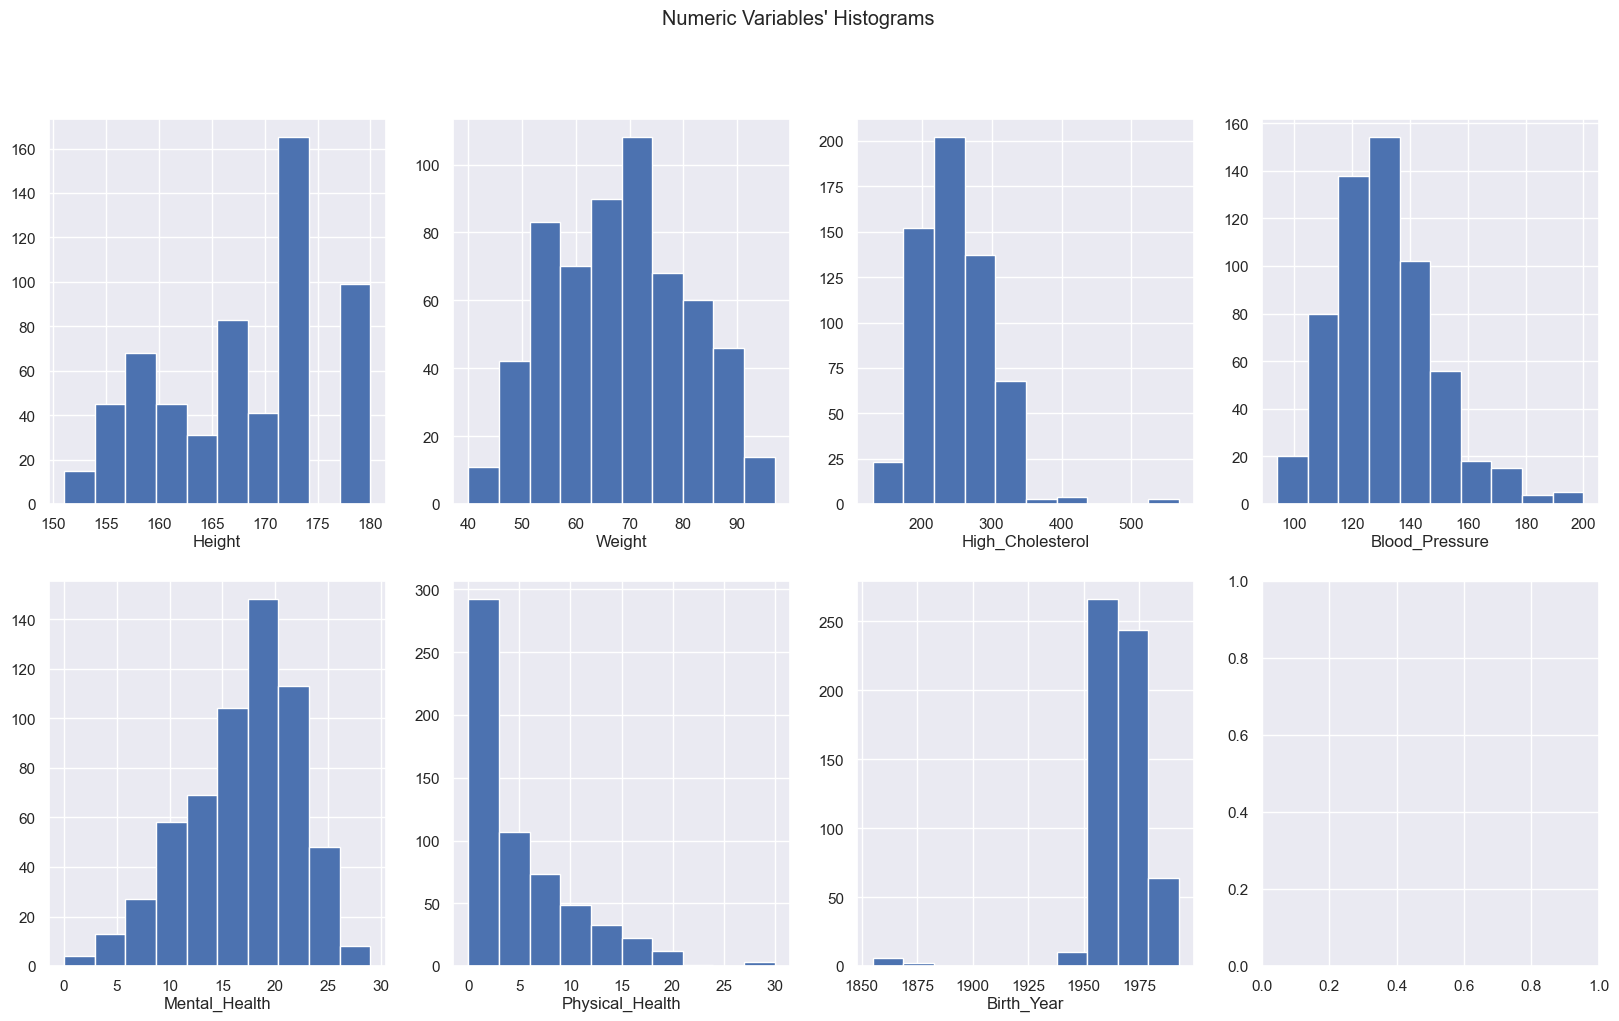

In [21]:
# All Numeric Variables' Histograms in one figure
sns.set()

 #Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

__`Step 17`__ Test:Compare the spreads of the normalized column to the original one

__`Step 18`__ Plot box plots to see outliers better

In [22]:
X_train_metric=X_train.select_dtypes(exclude=['object'])

for column in X_train_metric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=X_train_metric, x=column)

__`Step 19`__ Frequencies of categoricals

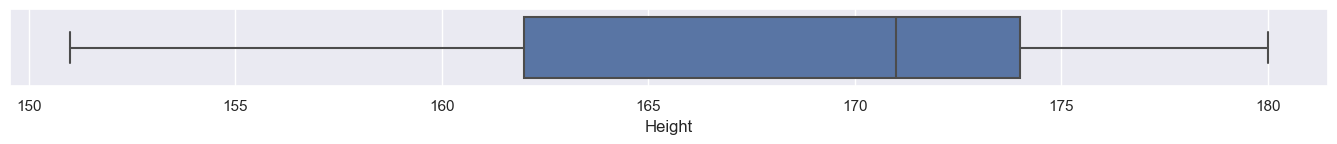

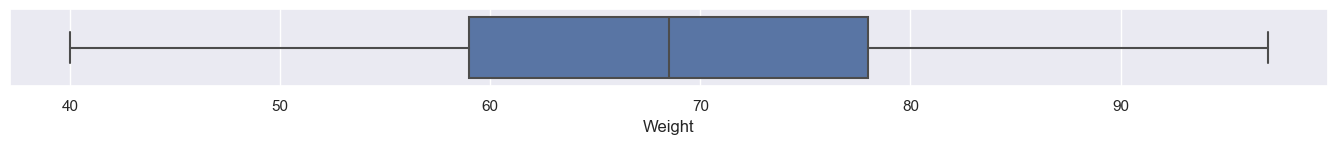

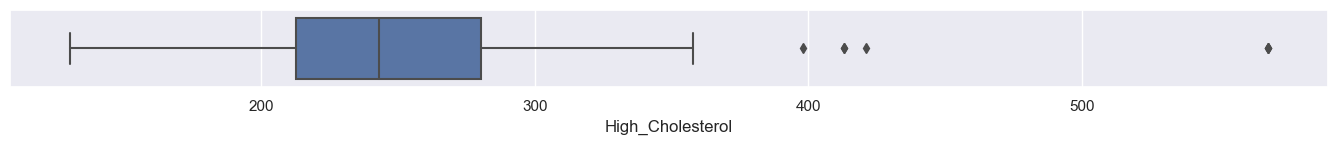

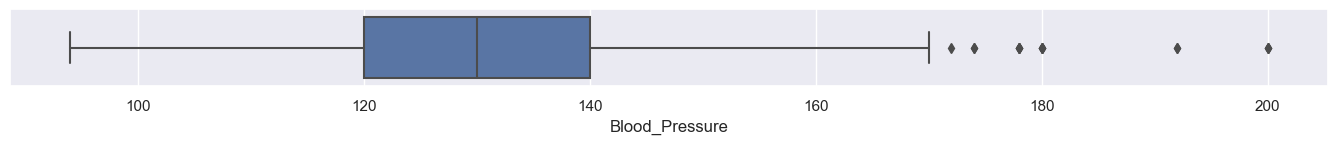

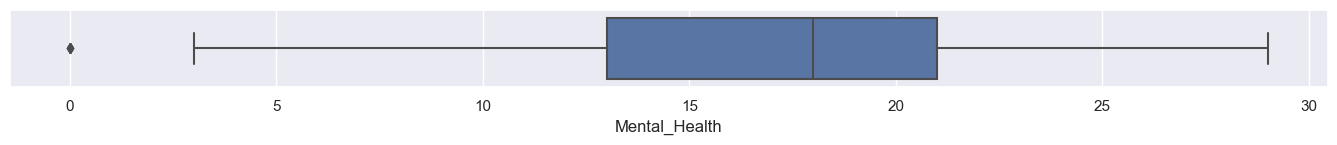

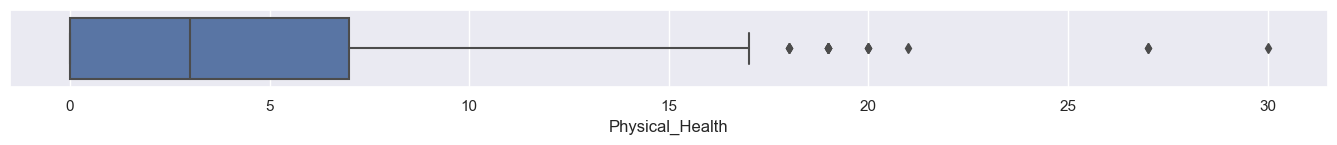

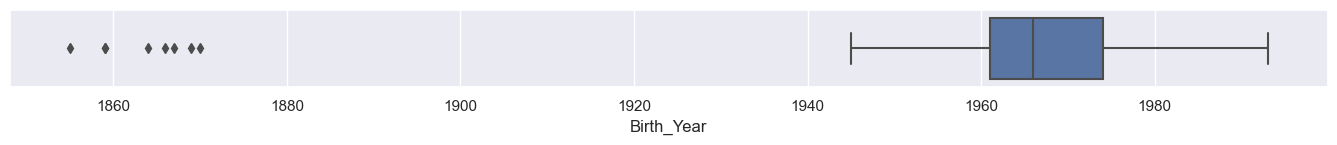

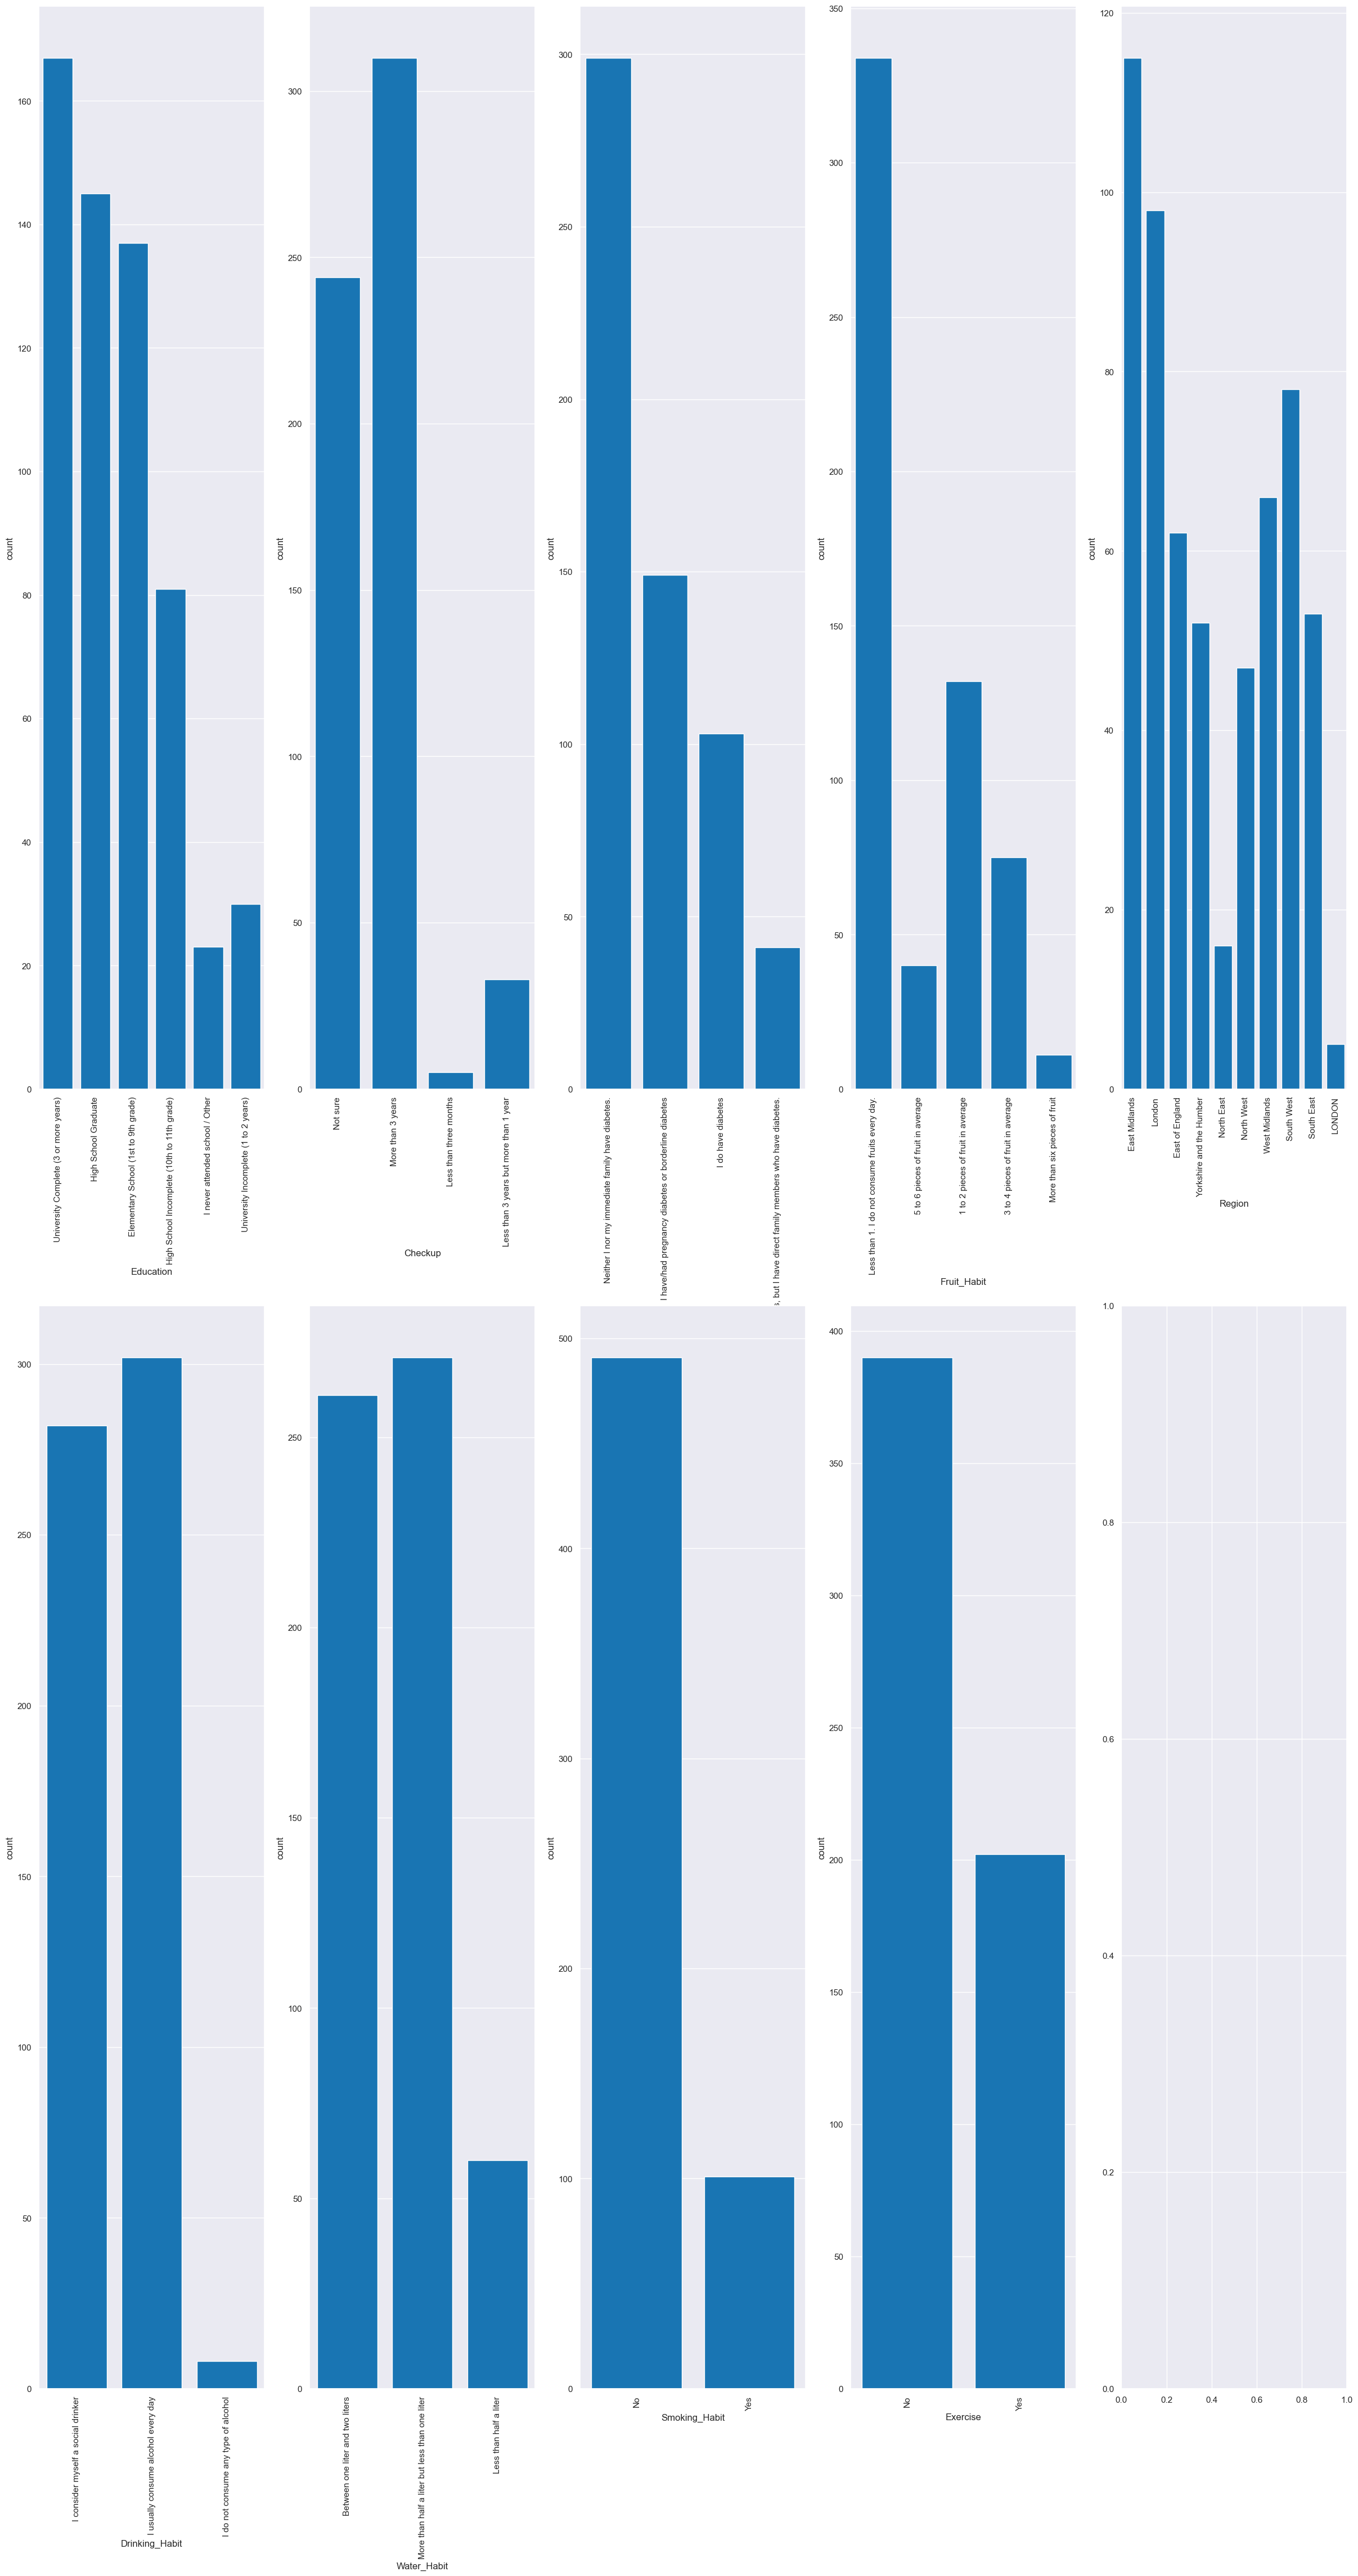

In [23]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

#Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(30, 55))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=X_train[feat].astype(object), ax=ax, color='#007acc')
    ax.tick_params(axis='x', rotation=90)



plt.show()

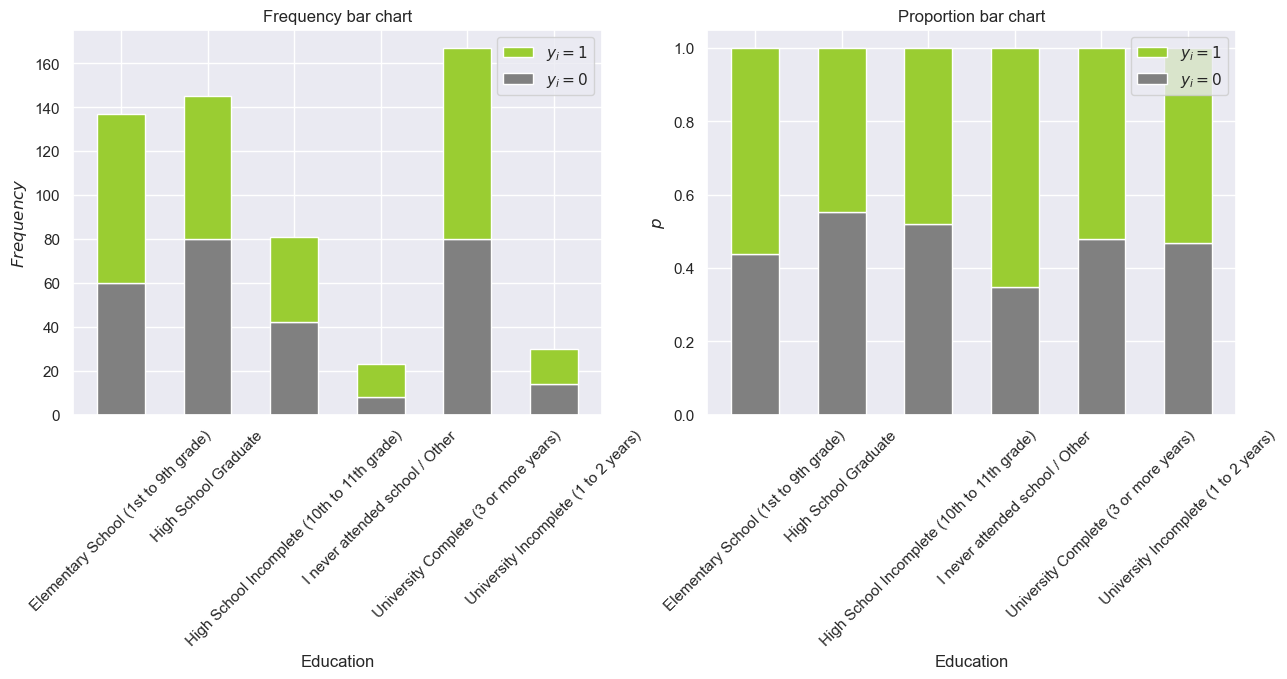

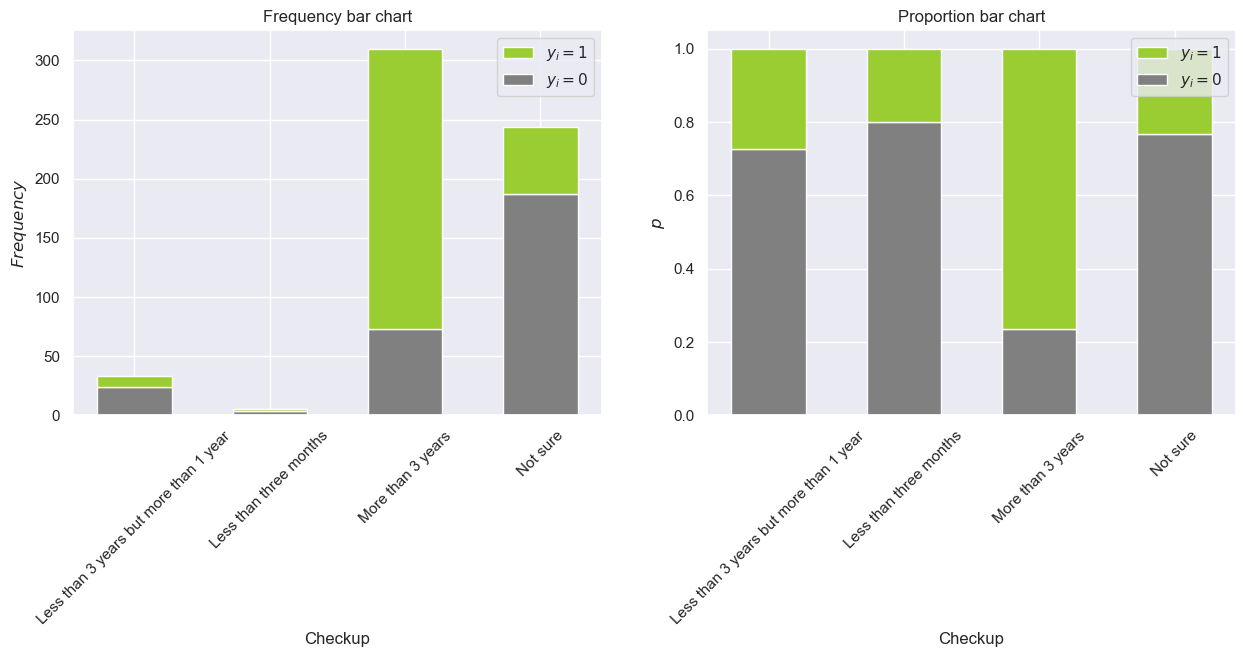

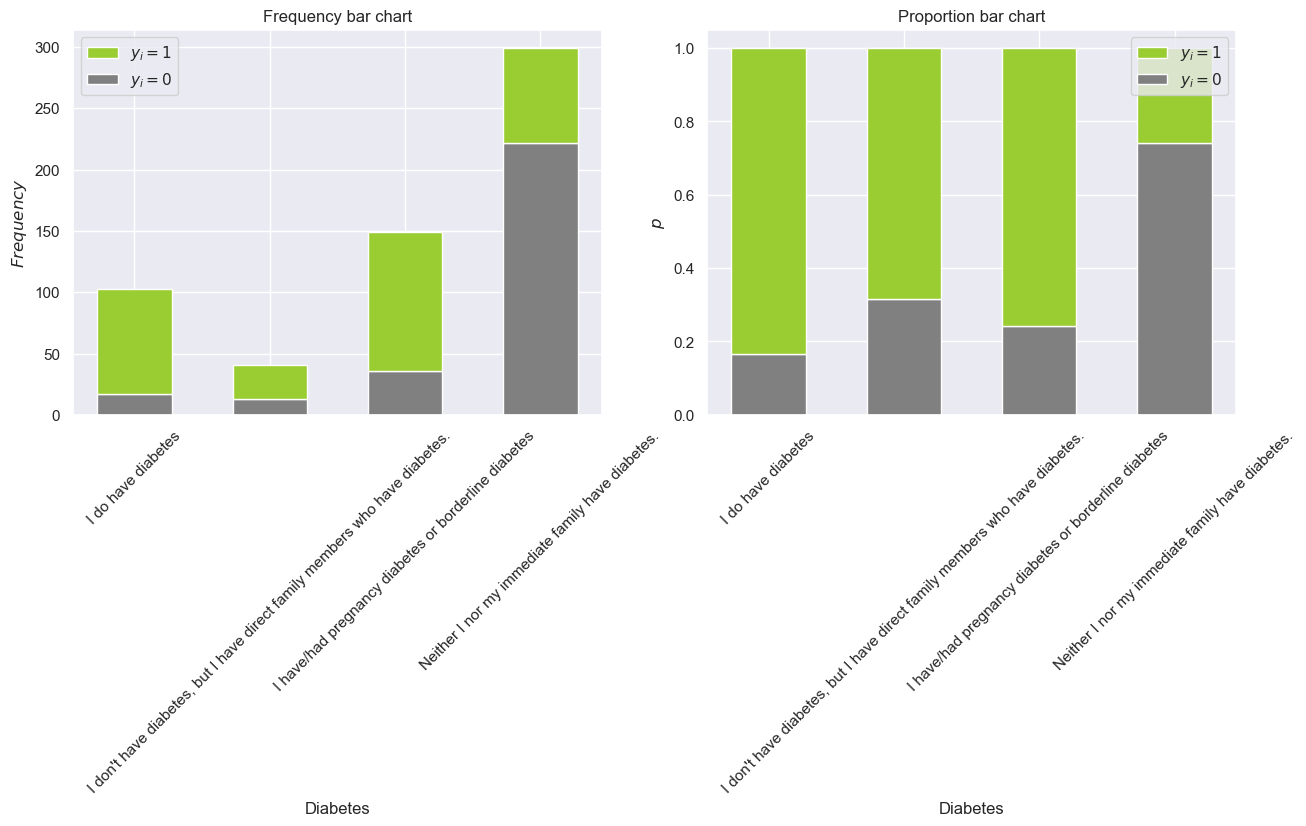

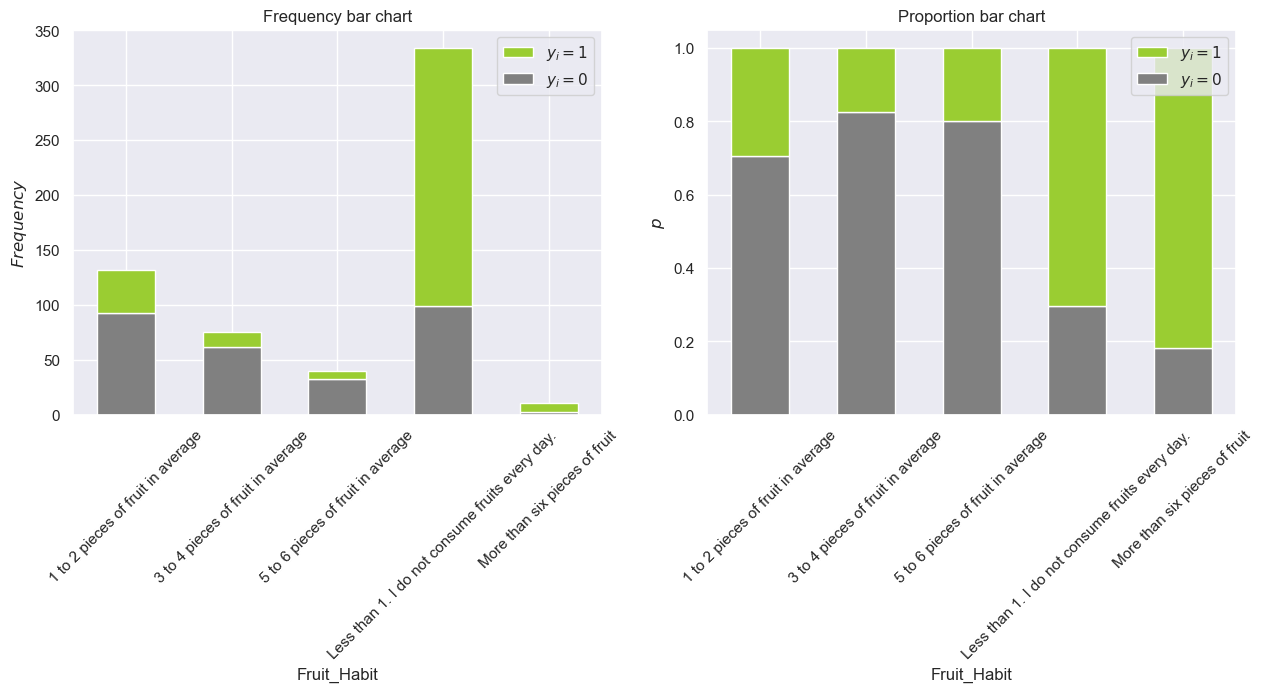

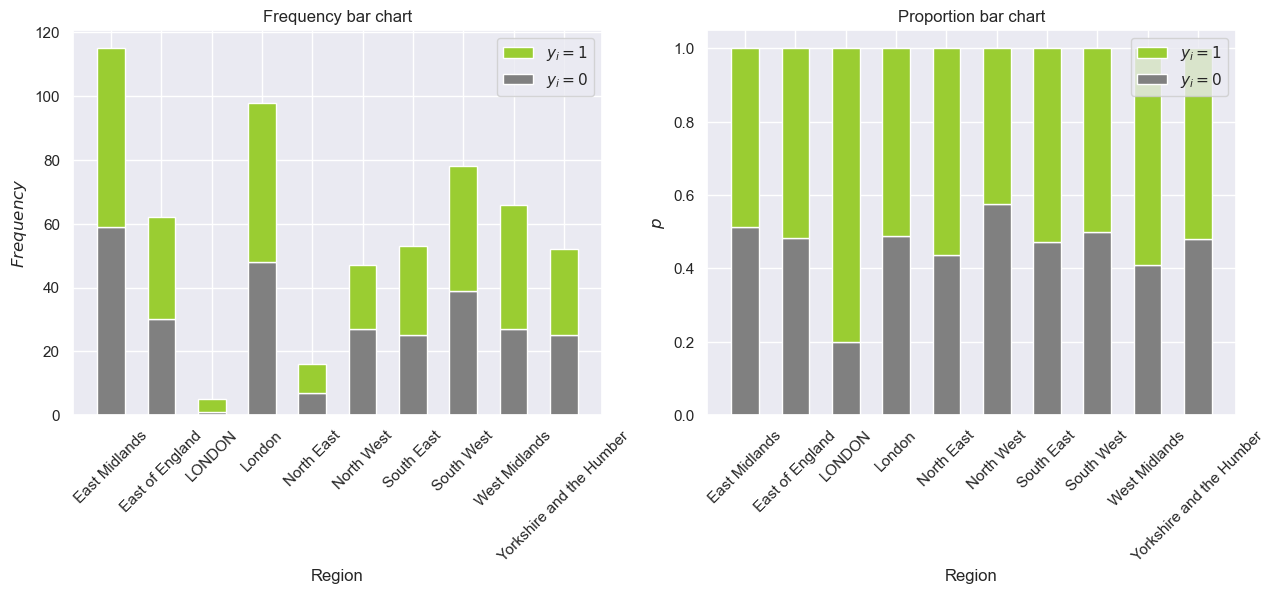

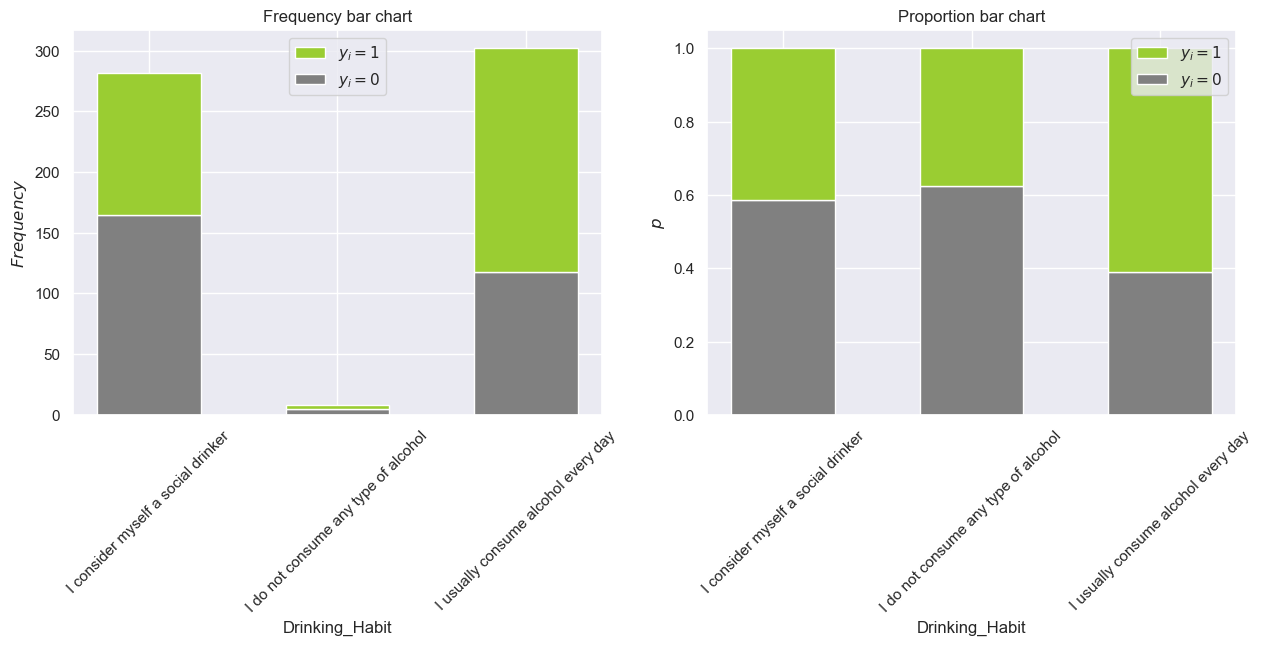

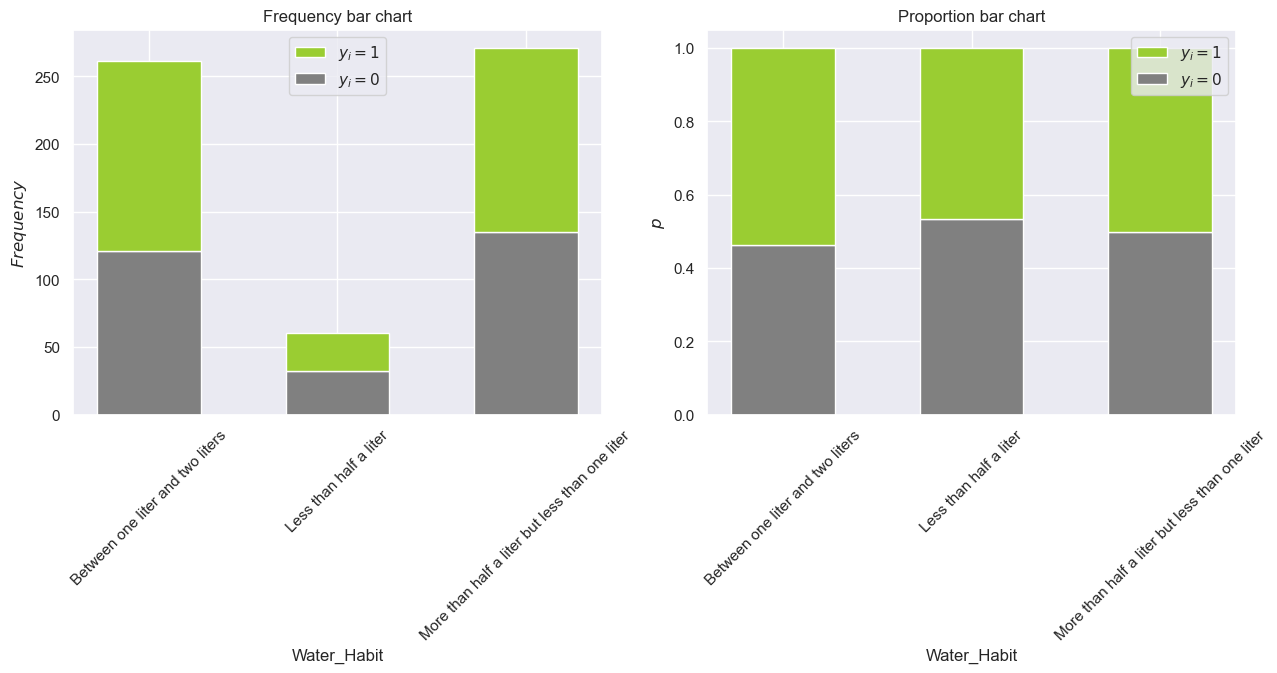

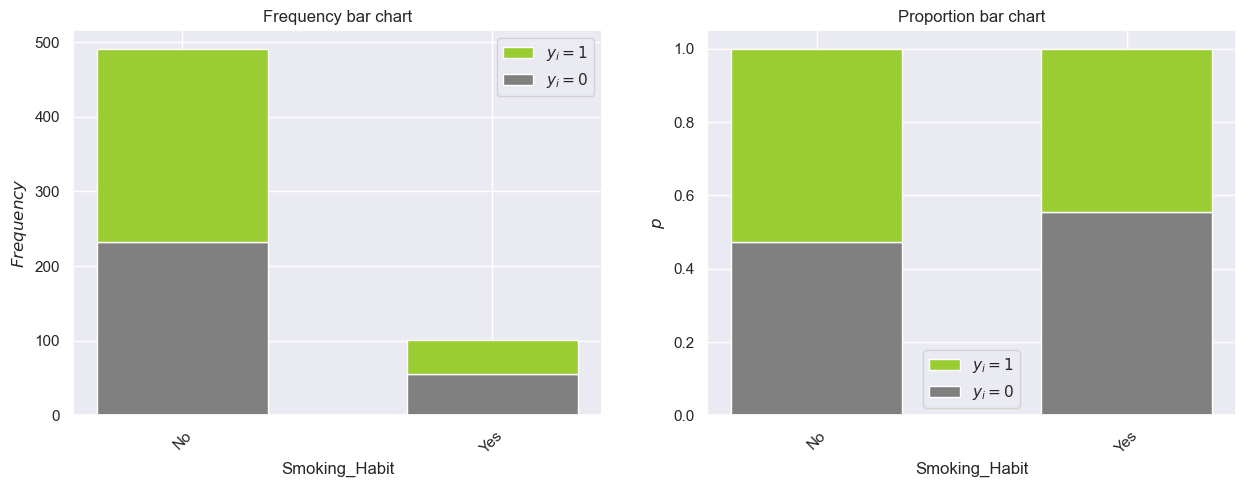

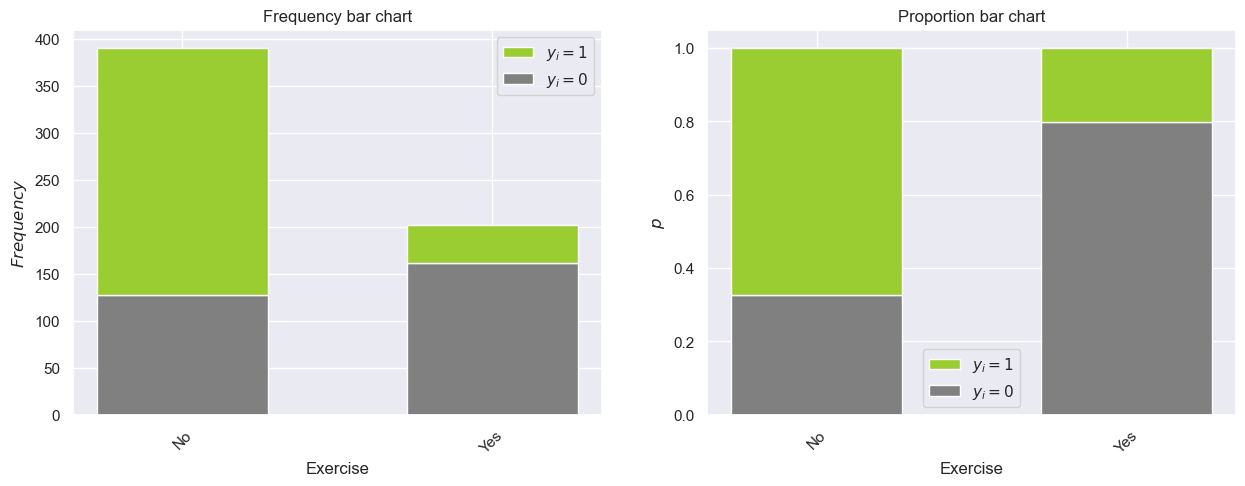

In [24]:
# first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation = 45)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation = 45)
    plt.ylabel("$p$")

    plt.show()
    
for metric in non_metric_features:
    bar_charts_categorical(all_train, metric, "Disease")

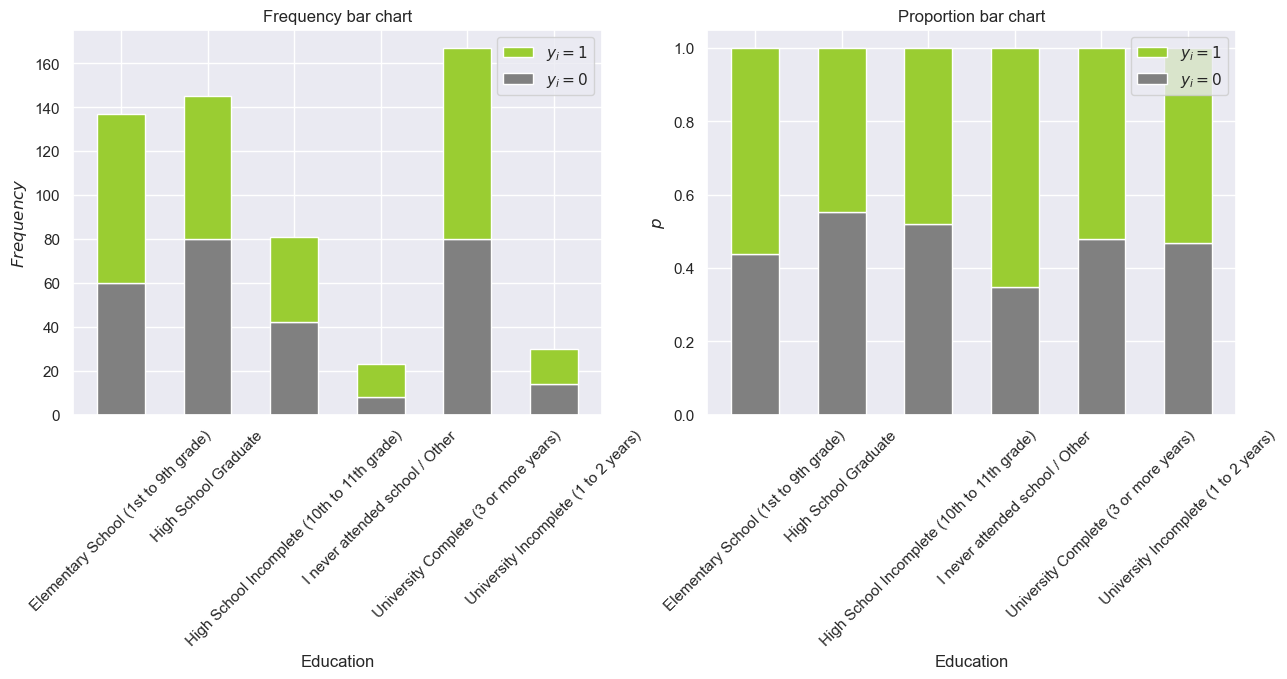

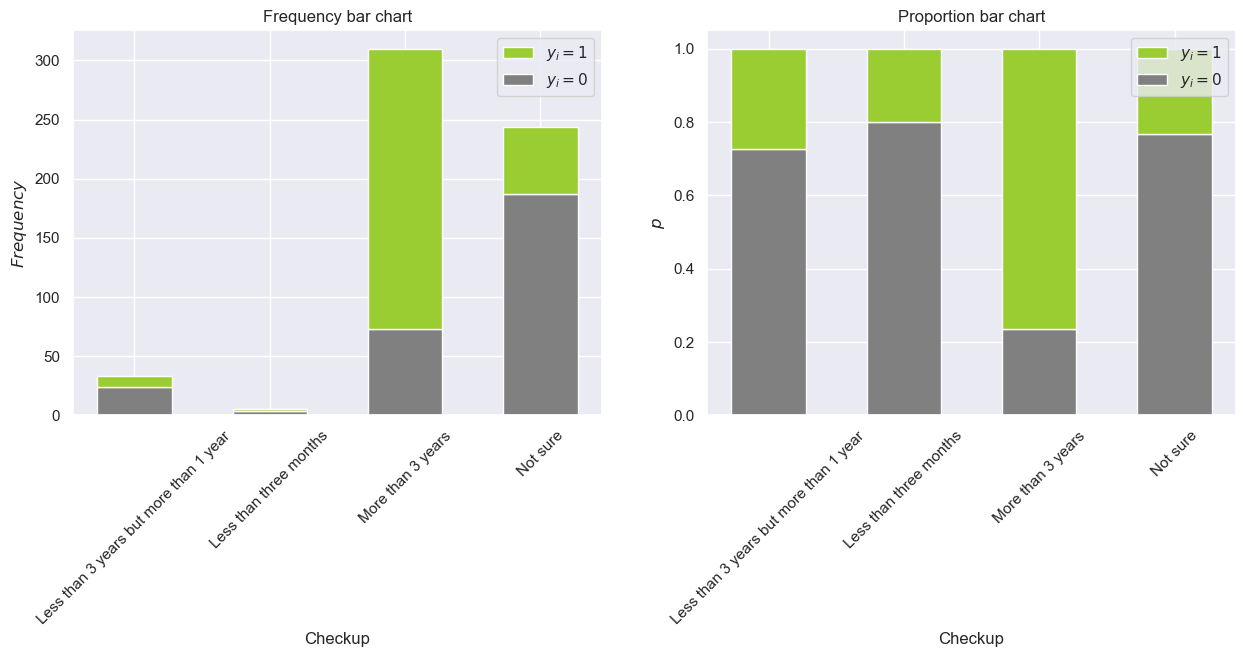

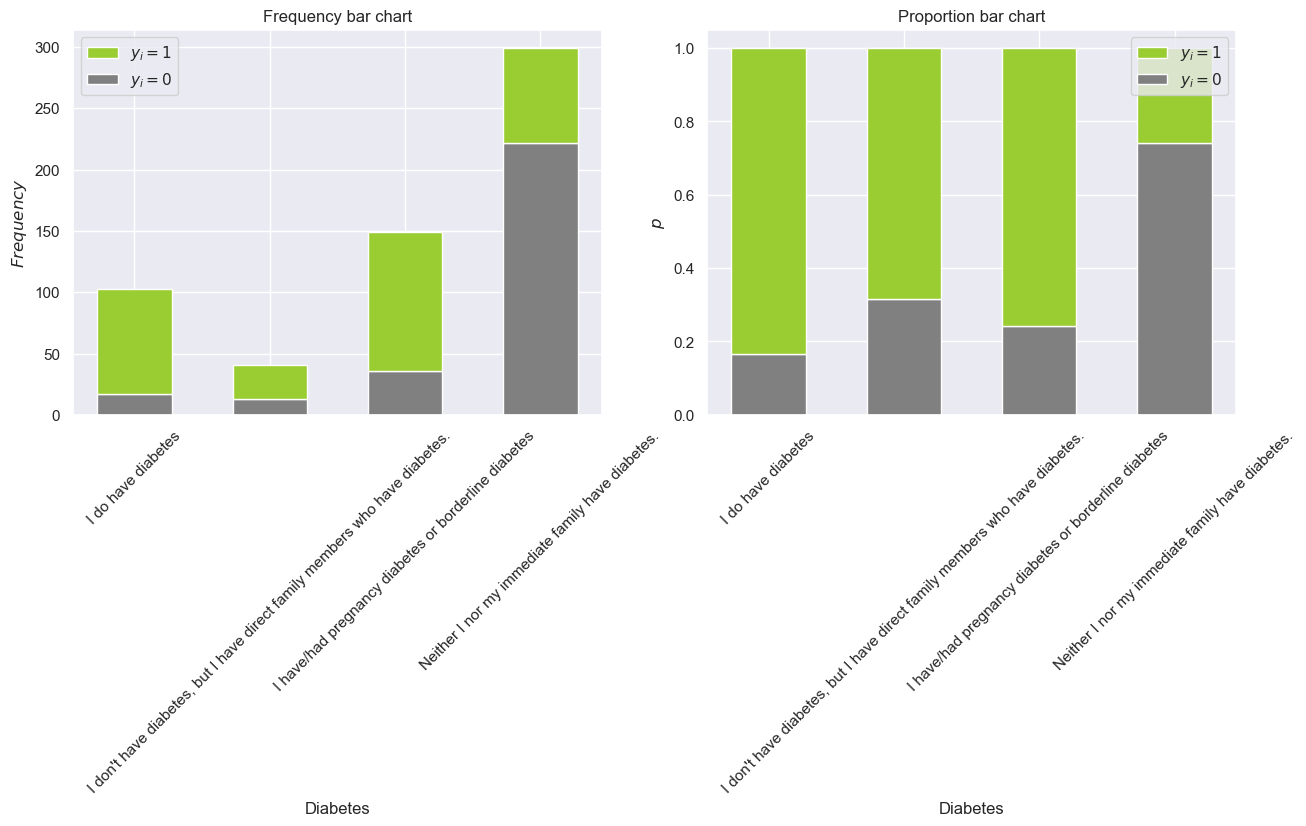

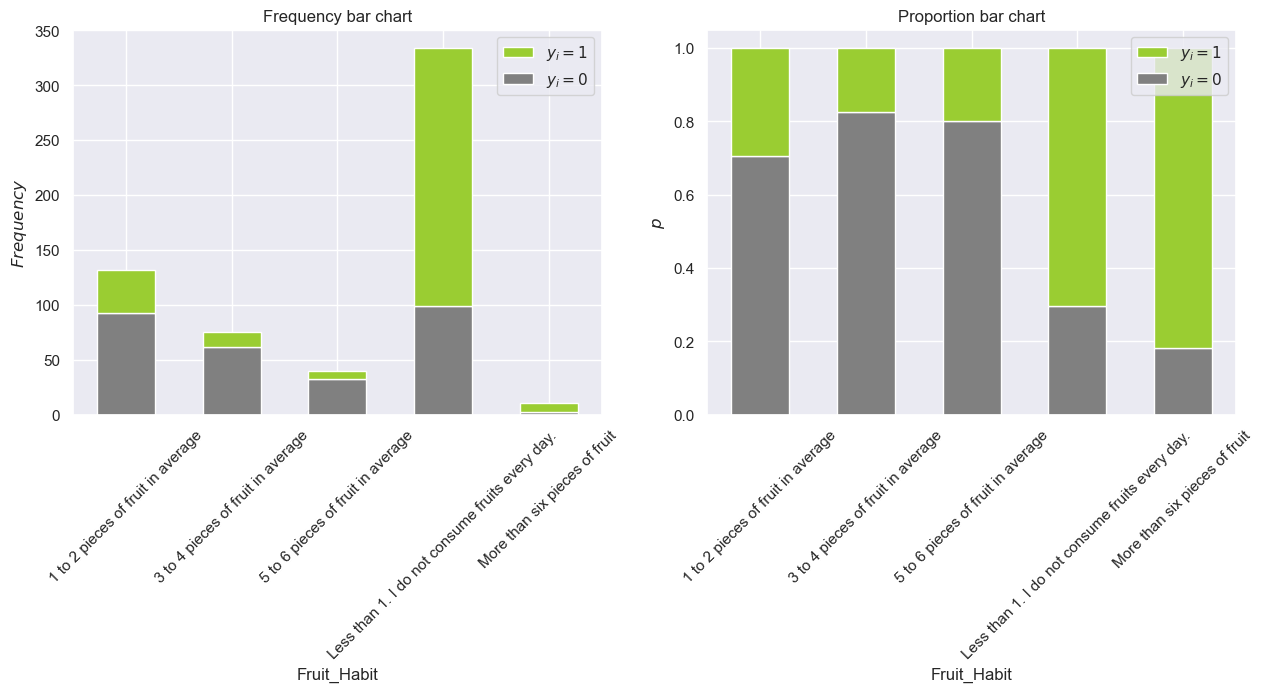

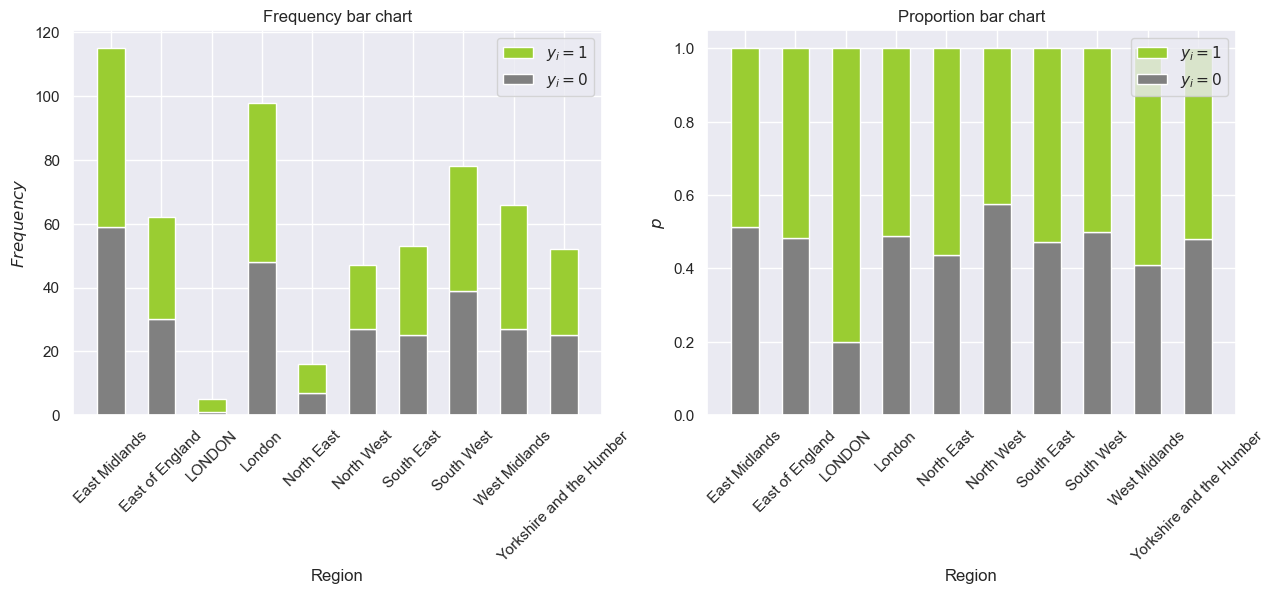

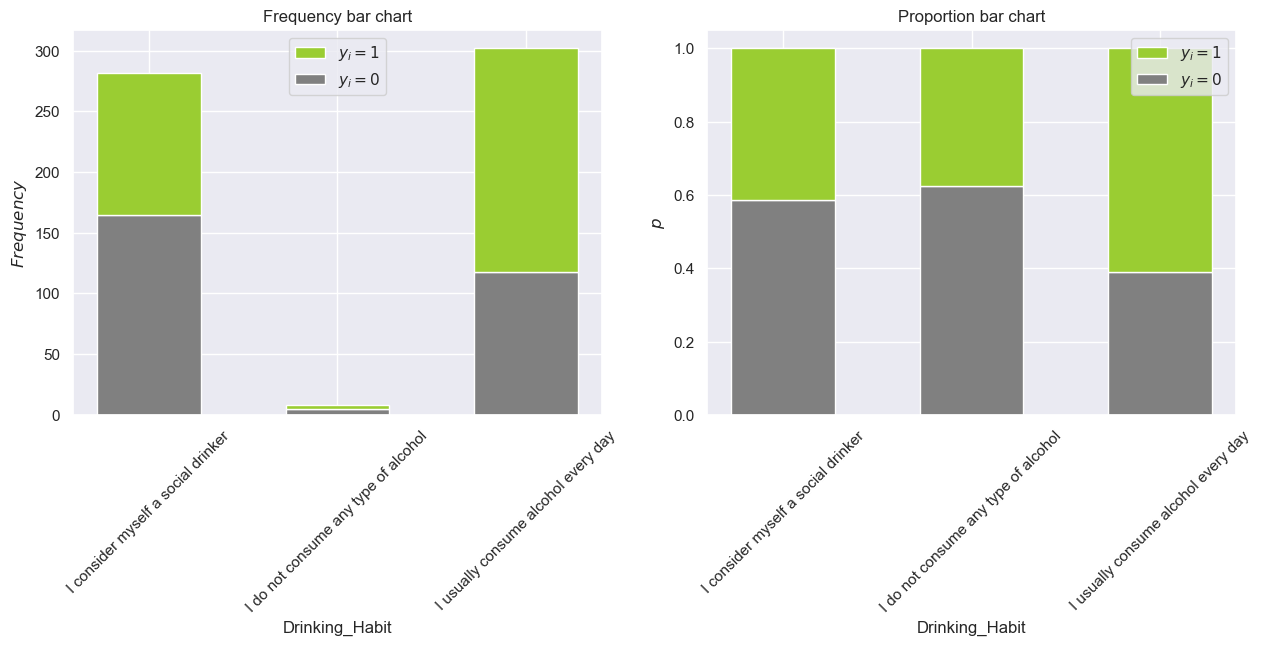

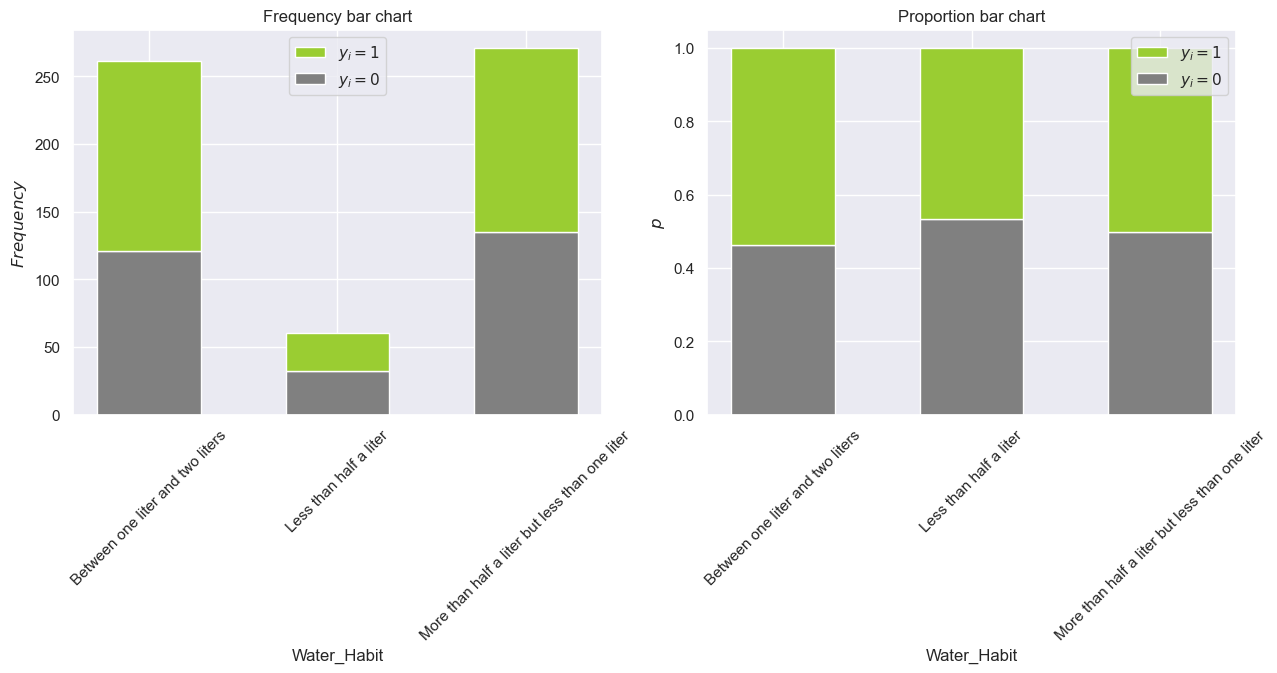

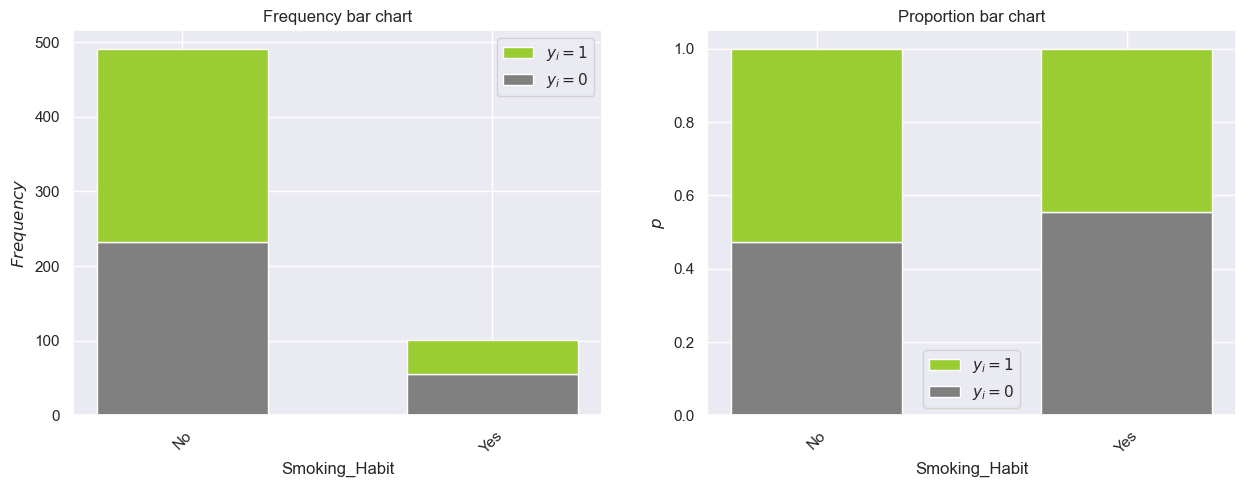

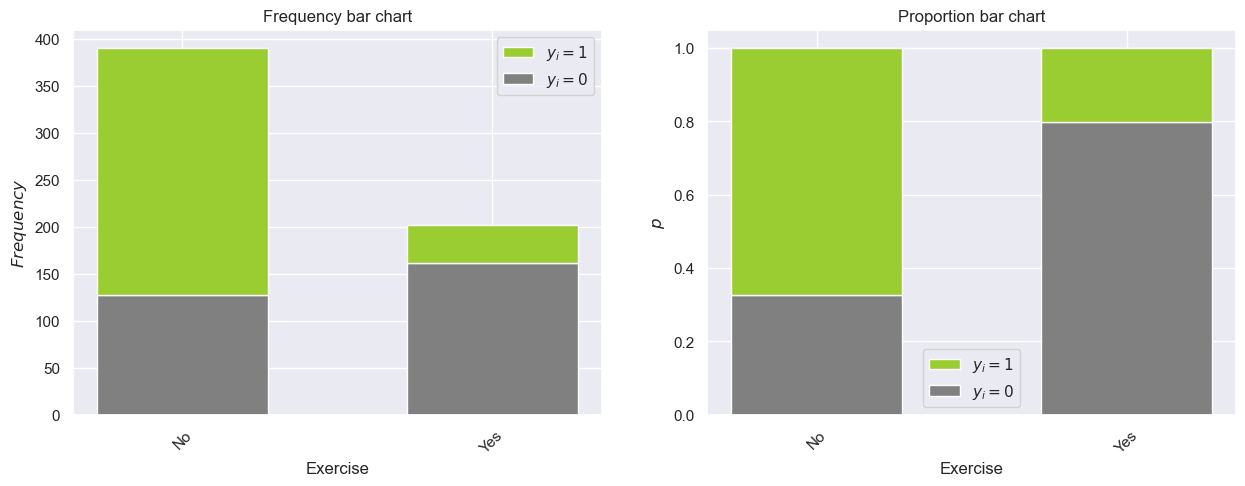

In [25]:
for metric in non_metric_features:
    bar_charts_categorical(all_train, metric, "Disease")

In [26]:
# fill NaN of education with mode of column
X_train = X_train.fillna(X_train.mode().iloc[0])
X_val = X_val.fillna(X_train.mode().iloc[0])

In [27]:


def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [31]:
testo = X_train[non_metric_features].join(y_train)

for var in testo:
    TestIndependence(testo[var],y_train, var)

Education is NOT an important predictor. (Discard Education from model)
Checkup is IMPORTANT for Prediction
Diabetes is IMPORTANT for Prediction
Fruit_Habit is IMPORTANT for Prediction
Region is NOT an important predictor. (Discard Region from model)
Drinking_Habit is IMPORTANT for Prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)
Smoking_Habit is NOT an important predictor. (Discard Smoking_Habit from model)
Exercise is IMPORTANT for Prediction
Disease is IMPORTANT for Prediction


In [29]:
testo

,Education,Checkup,Diabetes,Fruit_Habit,Region,Drinking_Habit,Water_Habit,Smoking_Habit,Exercise,Disease
555,University Complete (3 or more years),Not sure,Neither I nor my immediate family have diabetes.,Less than 1. I do not consume fruits every day.,East Midlands,I consider myself a social drinker,Between one liter and two liters,No,No,0
644,University Complete (3 or more years),More than 3 years,Neither I nor my immediate family have diabetes.,Less than 1. I do not consume fruits every day.,London,I usually consume alcohol every day,More than half a liter but less than one liter,No,Yes,0
596,High School Graduate,Not sure,Neither I nor my immediate family have diabetes.,Less than 1. I do not consume fruits every day.,East of England,I usually consume alcohol every day,More than half a liter but less than one liter,No,No,1
792,High School Graduate,Not sure,Neither I nor my immediate family have diabetes.,Less than 1. I do not consume fruits every day.,East Midlands,I consider myself a social drinker,More than half a liter but less than one liter,No,Yes,0
633,Elementary School (1st to 9th grade),Not sure,Neither I nor my immediate family have diabetes.,Less than 1. I do not consume fruits every day.,East of England,I consider myself a social drinker,More than half a liter but less than one liter,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...
117,University Complete (3 or more years),Not sure,Neither I nor my immediate family have diabetes.,3 to 4 pieces of fruit in average,South West,I usually consume alcohol every day,Between one liter and two liters,Yes,Yes,0
500,Elementary School (1st to 9th grade),Not sure,"I don't have diabetes, but I have direct famil...",Less than 1. I do not consume fruits every day.,East Midlands,I consider myself a social drinker,Between one liter and two liters,No,No,1
333,University Complete (3 or more years),Not sure,Neither I nor my immediate family have diabetes.,Less than 1. I do not consume fruits every day.,London,I usually consume alcohol every day,Between one liter and two liters,No,No,0
458,University Complete (3 or more years),More than 3 years,Neither I nor my immediate family have diabetes.,5 to 6 pieces of fruit in average,South West,I consider myself a social drinker,More than half a liter but less than one liter,No,No,0


In [ ]:
X_train['Region'] = X_train['Region'].replace('LONDON','London')
X_val['Region'] = X_val['Region'].replace('LONDON','London')

In [ ]:
X_train.isna().sum()

In [ ]:
#metric_features = ['Mental_Health', 'Physical_Health']
import warnings
warnings.filterwarnings('ignore')

q25 = X_train.quantile(.25)
q75 = X_train.quantile(.75)
iqr = (q75 - q25)
upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

X_train[metric_features] = X_train[metric_features][(X_train < upper_lim) & (X_train > lower_lim)]
X_train

import warnings
warnings.filterwarnings('ignore')

q25 = X_train.quantile(.25)
q75 = X_train.quantile(.75)
iqr = (q75 - q25)
upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

X_val[metric_features] = X_val[metric_features][(X_val < upper_lim) & (X_val > lower_lim)]
X_val

# median imputation

for metric in metric_features:
    X_train[metric] = X_train[metric].fillna(X_train[metric].median())
    
for metric in metric_features:
    X_val[metric] = X_val[metric].fillna(X_train[metric].median())

# knn   
    
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=2)
#X_train[metric_features] = pd.DataFrame(imputer.fit_transform(X_train[metric_features]),columns = X_train[metric_features].columns)
#X_val[metric_features] = pd.DataFrame(imputer.transform(X_val[metric_features]),columns = X_val[metric_features].columns)

In [ ]:
X_train_metric=X_train.select_dtypes(exclude=['object'])

for column in X_train_metric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=X_train_metric, x=column)

In [ ]:
explo2 = X_train[metric_features].join(y_train)
sns.pairplot(explo2, diag_kind="hist", hue='Disease', corner = True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

__`Notice`__ Manual Filter which we didnt choose to use

import numpy as np
X_train['Physical_Health']=X_train['Physical_Health'].mask(X_train['Physical_Health']>=25)
X_train['Mental_Health']=X_train['Mental_Health'].mask(X_train['Mental_Health']<2)
X_val['Physical_Health']=X_val['Physical_Health'].mask(X_val['Physical_Health']>=25)
X_val['Mental_Health']=X_val['Mental_Health'].mask(X_val['Mental_Health']<2)
test_data['Physical_Health']=test_data['Physical_Health'].mask(test_data['Physical_Health']>=25)
test_data['Mental_Health']=test_data['Mental_Health'].mask(test_data['Mental_Health']<2)



for metric in metric_features:
    X_train[metric] = X_train[metric].fillna(X_train[metric].median())
    
for metric in metric_features:
    X_val[metric] = X_val[metric].fillna(X_train[metric].median())
    
for metric in metric_features:
    test_data[metric] = test_data[metric].fillna(X_train[metric].median())

__`Notice`__ We used the scaler order to select the metric features, we disabled it afterwards as to not interfere with the GridSearchCV KFold

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#### scale metric
scaler = RobustScaler()
#### scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(X_train[metric_features])
X_train[metric_features] = scaled_feat
scaled_feat = scaler.transform(X_val[metric_features])
X_val[metric_features] = scaled_feat
scaled_feat = scaler.transform(test_data[metric_features])
test_data[metric_features] = scaled_feat

In [ ]:


non_metric_features = ["Education", "Checkup", "Diabetes", "Fruit_Habit","Region", "Drinking_Habit", "Water_Habit", "Smoking_Habit" , "Exercise"]
metric_features = X_train.columns.drop(non_metric_features).to_list()
print(metric_features)
all_train_num = X_train[metric_features].join(y_train)




def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
    plt.show()
cor_spearman = all_train_num.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [ ]:
cor_spearman

In [ ]:
# Model is not as reliable with this BMI metric

#x = X_val['Weight']
#y = X_val['Height']*X_val['Height']

#X_val['BMI'] = round((x/y)*10000,2)


#x = X_train['Weight']
#y = X_train['Height']*X_train['Height']

#X_train['BMI'] = round((x/y)*10000,2)

#x = test_data['Weight']
#y = test_data['Height']*test_data['Height']

#test_data['BMI'] = round((x/y)*10000,2)

__`Notice`__ Feature Selection with RFE and Lasso

In [ ]:
#no of features
model = LogisticRegression()
nof_list=list(range(1,10))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(all_train_num[metric_features],y_train)
    X_val_rfe = rfe.transform(X_val[metric_features])
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:

from sklearn.linear_model import LassoCV

X_train_num_scaled = X_train[metric_features]
# DO IT
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
reg = LassoCV()
reg.fit(X_train_num_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef.sort_values()
plot_importance(coef,'Lasso')

In [ ]:
rfe = RFE(estimator = model, n_features_to_select = 4)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

__`Notice`__ We proceeded here with the selected features

In [ ]:
non_metric_features = ['Drinking_Habit', 'Diabetes','Exercise','Checkup','Fruit_Habit']
df_ohc = X_train[['Height','High_Cholesterol','Mental_Health', 'Physical_Health','Fruit_Habit','Drinking_Habit', 'Diabetes','Exercise','Checkup']]
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df
X_train_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
X_train = X_train_ohc
X_train


In [ ]:
df_ohc_val = X_val.copy()
df_ohc_val = X_val[['Height','High_Cholesterol','Mental_Health', 'Physical_Health','Fruit_Habit','Drinking_Habit', 'Diabetes','Exercise','Checkup']]
#df_ohc_val.set_index('index', inplace = True)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc_val[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df_val = pd.DataFrame(ohc_feat, index=df_ohc_val.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df_val
X_val = pd.concat([df_ohc_val.drop(columns=non_metric_features), ohc_df_val], axis=1)
X_val

df_ohc_val = X_val.copy()
#df_ohc_val.set_index('index', inplace = True)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc_val[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df_val = pd.DataFrame(ohc_feat, index=df_ohc_val.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df_val
X_val = pd.concat([df_ohc_val.drop(columns=non_metric_features), ohc_df_val], axis=1)
X_val

In [ ]:
# this is called df_ohc_val but it s actually for test

df_ohc_val = test_data.copy()
df_ohc_val = df_ohc_val[['Height','High_Cholesterol','Mental_Health', 'Physical_Health','Fruit_Habit','Drinking_Habit', 'Diabetes','Exercise','Checkup']]
#df_ohc_val.set_index('index', inplace = True)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc_val[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df_val = pd.DataFrame(ohc_feat, index=df_ohc_val.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df_val
test_data = pd.concat([df_ohc_val.drop(columns=non_metric_features), ohc_df_val], axis=1)
test_data

final_featuresM = ['Mental_Health', 'Physical_Health','High_Cholesterol','Height'] 
X_trainlazy = X_train
X_vallazy = X_val

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# scale metric
#scaler = RobustScaler()
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(X_trainlazy[final_featuresM])
X_trainlazy[final_featuresM] = scaled_feat



scaled_featv = scaler.transform(X_vallazy[final_featuresM])
X_vallazy[final_featuresM] = scaled_featv


from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_trainlazy, X_vallazy, y_train, y_val)

print(models)

# Models

In [ ]:
# Bagging untuned
import time
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', BaggingClassifier())
])

params= {}

BaggingU = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

BaggingU.fit(X_train,y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = BaggingU.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = BaggingU.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# Bagging tuned
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', BaggingClassifier())])

params= {'rf__n_estimators': [30],
        'rf__max_samples': [0.95],
        'rf__max_features': [0.95]}

BaggingT = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

BaggingT.fit(X_train,y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = BaggingT.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = BaggingT.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# Extra Trees

import time


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', ExtraTreesClassifier())
])

params= {'rf__n_estimators' :[100]}

ExtraTrees = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

ExtraTrees.fit(X_train,y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = ExtraTrees.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = ExtraTrees.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))



In [ ]:
# This was the final submission we have sent in Kaggle

KaggleSubmission = ExtraTrees.predict(test_data)

In [ ]:
#Export
#from numpy import savetxt
#savetxt('FinalPreidction.csv', KaggleSubmission, delimiter=',')

In [ ]:
# RandomForestClassifier untuned

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', RandomForestClassifier())
])

params= {}

search = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

search.fit(X_train,y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = search.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = search.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# RandomForestClassifier tuned

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', RandomForestClassifier())
])

params= {'rf__n_estimators':[150]}

RandomForest = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

RandomForest.fit(X_train,y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = RandomForest.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = RandomForest.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
 # ROC for the random forest models

In [ ]:
# Extreme gradient boosting untuned

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', XGBClassifier())
])

params= {}

search = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

search.fit(X_train,y_train)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = search.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = search.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# Extreme gradient boosting tuned

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', XGBClassifier())
])

params= {}

XGBC = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

XGBC.fit(X_train,y_train)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = XGBC.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = XGBC.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities

# generate a no skill prediction (majority class)
BaggingT_probs = BaggingT.predict_proba(X_val)
RandomForest_probs = RandomForest.predict_proba(X_val)
ExtraTrees_probs = ExtraTrees.predict_proba(X_val)
XGBC_probs = XGBC.predict_proba(X_val)

XGBC
# keep probabilities for the positive outcome only
RandomForest_probs = RandomForest_probs[:, 1]
BaggingT_probs = BaggingT_probs[:, 1]
ExtraTrees_probs = ExtraTrees_probs[:, 1]
XGBC_probs = XGBC_probs[:, 1]
# calculate scores
BaggingT_auc = roc_auc_score(y_val, BaggingT_probs)
RandomForest_auc = roc_auc_score(y_val, RandomForest_probs)
ExtraTrees_auc = roc_auc_score(y_val, ExtraTrees_probs)
XGBC_auc = roc_auc_score(y_val, XGBC_probs)
# summarize scores
print('Bagging tuned: ROC AUC=%.3f' % (BaggingT_auc))
print('RandomForest: ROC AUC=%.3f' % (RandomForest_auc))
print('Extra Trees: ROC AUC=%.3f' % (ExtraTrees_auc))
print('XGBC: ROC AUC=%.3f' % (XGBC_auc))
# calculate roc curves
BaggingT_probs_fpr, BaggingT_probs_tpr, _ = roc_curve(y_val, BaggingT_probs)
RandomForest_fpr, RandomForest_tpr, _ = roc_curve(y_val, RandomForest_probs)
XGBC_fpr, XGBC_tpr, _ = roc_curve(y_val, XGBC_probs)
ExtraTrees_fpr, ExtraTrees_tpr, _ = roc_curve(y_val, ExtraTrees_probs)

# plot the roc curve for the model
pyplot.plot(BaggingT_probs_fpr, BaggingT_probs_tpr, linestyle='--', label='Bagging')
pyplot.plot(RandomForest_fpr, RandomForest_tpr, marker='.', label='Random Forest')
pyplot.plot(XGBC_fpr, XGBC_tpr, marker='.', label='XGBC')
pyplot.plot(ExtraTrees_fpr, ExtraTrees_tpr, marker='.', label='Extra Trees')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
 # ROC for the gradient boosting models

In [ ]:
# KNN untuned

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', KNeighborsClassifier())
])

params= {'rf__n_neighbors' :[1],
        'rf__p':[1]}

search = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

search.fit(X_train,y_train)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = search.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = search.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# KNN tuned

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', KNeighborsClassifier())
])

params= {'rf__n_neighbors' :[1],
        'rf__p':[1]}

KNN = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

KNN.fit(X_train,y_train)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = KNN.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = KNN.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
 # ROC for the KNN models

In [ ]:
# Neural Network untuned

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', MLPClassifier())
])

params= {}

search = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

search.fit(X_train,y_train)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = search.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = search.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# Neural Network tuned

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', MLPClassifier())
])

params= {'rf__hidden_layer_sizes': [1000],
        'rf__solver': ['lbfgs']}

MLP = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

MLP.fit(X_train,y_train)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = MLP.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = MLP.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# ROC for the Neural Network models

In [ ]:
# Log Regression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', LogisticRegression())
])

params= {}

Logistic = GridSearchCV(estimator = pipe,
                     param_grid=params,
                      cv = 10,
                     return_train_score=True)

# get the start time
st = time.time()

Logistic.fit(X_train,y_train)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

predictions = Logistic.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = Logistic.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))


In [ ]:
# QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
pipe = Pipeline([
    ('sc', MinMaxScaler()),
    ('rf', QuadraticDiscriminantAnalysis())
])

params= {}

Quadratic = GridSearchCV(estimator = pipe,
                     param_grid=params,
                    cv = 10,
                     return_train_score=True)

Quadratic.fit(X_train,y_train)

predictions = Quadratic.predict(X_train) 
print(classification_report(y_train, predictions)) 


predictions = Quadratic.predict(X_val) 
print(classification_report(y_val, predictions)) 



print(metrics.confusion_matrix(y_val, predictions))

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities

# generate a no skill prediction (majority class)
MLP_probs = MLP.predict_proba(X_val)
Logistic_probs = Logistic.predict_proba(X_val)
KNN_probs = KNN.predict_proba(X_val)
Quadratic_probs = Quadratic.predict_proba(X_val)

Quadratic
# keep probabilities for the positive outcome only
Logistic_probs = Logistic_probs[:, 1]
MLP_probs = MLP_probs[:, 1]
KNN_probs = KNN_probs[:, 1]
Quadratic_probs = Quadratic_probs[:, 1]
# calculate scores
MLP_auc = roc_auc_score(y_val, MLP_probs)
Logistic_auc = roc_auc_score(y_val, Logistic_probs)
KNN_auc = roc_auc_score(y_val, KNN_probs)
Quadratic_auc = roc_auc_score(y_val, Quadratic_probs)
# summarize scores
print('MLP: ROC AUC=%.3f' % (MLP_auc))
print('Logistic: ROC AUC=%.3f' % (Logistic_auc))
print('KNN: ROC AUC=%.3f' % (KNN_auc))
print('Quadratic: ROC AUC=%.3f' % (Quadratic_auc))
# calculate roc curves
MLP_probs_fpr, MLP_probs_tpr, _ = roc_curve(y_val, MLP_probs)
Logistic_fpr, Logistic_tpr, _ = roc_curve(y_val, Logistic_probs)
Quadratic_fpr, Quadratic_tpr, _ = roc_curve(y_val, Quadratic_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_val, KNN_probs)

# plot the roc curve for the model
pyplot.plot(MLP_probs_fpr, MLP_probs_tpr, linestyle='--', label='MLP')
pyplot.plot(Logistic_fpr, Logistic_tpr, marker='.', label='Logistic')
pyplot.plot(Quadratic_fpr, Quadratic_tpr, marker='.', label='Quadratic')
pyplot.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Outlier treatment and inputation repository
__`Step 20`__ Perform outlier removal with the interquartile range method

In [ ]:
#manual filter

filters = (
    (X_train['Age in 2022']<=100)
    &
    (X_train['High_Cholesterol']<=370)
    &
    (X_train['Physical_Health']<=17)
    &
    (X_train['Blood_Pressure']<=171)
    &
    (X_train['Fruit_Habit']!='More than six pieces of fruit')
)

X_train_f = X_train[filters]
print('Percentage of data kept after removing outliers:', np.round(X_train_f.shape[0] / X_train.shape[0], 4))
X_train = X_train_f

In [ ]:
#manual filter


X_train['Physical_Health']=X_train['Physical_Health'].mask(X_train['Physical_Health']>=25)
X_train['Mental_Health']=X_train['Mental_Health'].mask(X_train['Physical_Health']<=5)
X_val['Physical_Health']=X_val['Physical_Health'].mask(X_val['Physical_Health']>=25)
X_val['Mental_Health']=X_val['Mental_Health'].mask(X_val['Physical_Health']<2)

for metric in metric_features:
    X_train['Physical_Health'] = X_train['Physical_Health'].fillna(['Physical_Health'].median())
    X_val['Physical_Health'] = X_val['Physical_Health'].fillna(['Physical_Health'].median())

In [ ]:
q25 = X_train.quantile(.25)
q75 = X_train.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(X_train[metric].between(llim, ulim, inclusive=True))

X_train.reset_index(inplace = True)    
    
filters2 = pd.Series(np.all(filters2, 0))
X_train_filtered = X_train[filters2]
print('Percentage of data kept after removing outliers:', np.round(X_train_filtered.shape[0] / X_train.shape[0], 4))
X_train_filtered

X_train = X_train_filtered
X_train.set_index('index', inplace = True)
X_train




In [ ]:
selected_num = X_train[metric_features].join(y_train)
y_train = selected_num['Disease']
y_train

# Remove outliers without deleting rows

metric_features = ['Mental_Health', 'Physical_Health']
import warnings
warnings.filterwarnings('ignore')

q25 = X_train.quantile(.25)
q75 = X_train.quantile(.75)
iqr = (q75 - q25)
upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

X_train[metric_features] = X_train[metric_features][(X_train < upper_lim) & (X_train > lower_lim)]
X_train

import warnings
warnings.filterwarnings('ignore')

q25 = X_train.quantile(.25)
q75 = X_train.quantile(.75)
iqr = (q75 - q25)
upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

X_val[metric_features] = X_val[metric_features][(X_val < upper_lim) & (X_val > lower_lim)]
X_val

# median imputation

for metric in metric_features:
    X_train[metric] = X_train[metric].fillna(X_train[metric].median())
    
for metric in metric_features:
    X_val[metric] = X_val[metric].fillna(X_train[metric].median())





# KNN At this stage only works after encoding and after knowing which features to use 
 
# adapt this with the features that are going to be used    
metric_features = ['Mental_Health', 'Physical_Health']
non_metric_features = X_train.columns.drop(metric_features).to_list()
print(metric_features,non_metric_features)
allft = ['Mental_Health', 'Physical_Health','Drinking_Habit_Idonotconsumeanytypeofalcohol', 'Drinking_Habit_Iusuallyconsumealcoholeveryday', 'Diabetes_IdonthavediabetesbutIhavedirectfamilymemberswhohavediabetes', 'Diabetes_Ihavehadpregnancydiabetesorborderlinediabetes', 'Diabetes_NeitherInormyimmediatefamilyhavediabetes', 'Exercise_Yes', 'Checkup_Lessthanthreemonths', 'Checkup_Morethan3years', 'Checkup_Notsure']    

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(X_train[allft])
X_train[allft] = scaled_feat


scaled_featv = scaler.transform(X_val[allft])
X_val[allft] = scaled_featv
X_train

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val),columns = X_val.columns)

# Scaling Repositories

In [ ]:
metric_features = ['Mental_Health', 'Physical_Health']
non_metric_features = X_train.columns.drop(metric_features).to_list()
print(metric_features,non_metric_features)
allft = ['Mental_Health', 'Physical_Health','Drinking_Habit_Idonotconsumeanytypeofalcohol', 'Drinking_Habit_Iusuallyconsumealcoholeveryday', 'Diabetes_IdonthavediabetesbutIhavedirectfamilymemberswhohavediabetes', 'Diabetes_Ihavehadpregnancydiabetesorborderlinediabetes', 'Diabetes_NeitherInormyimmediatefamilyhavediabetes', 'Exercise_Yes', 'Checkup_Lessthanthreemonths', 'Checkup_Morethan3years', 'Checkup_Notsure']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#scaler = StandardScaler()
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(X_train[allft])
X_train[allft] = scaled_feat

### Don't scclae just yet because

scaled_featv = scaler.transform(X_val[allft])
X_val[allft] = scaled_featv
X_train

# Impute with KNN

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

In [ ]:
X_val = pd.DataFrame(imputer.transform(X_val),columns = X_val.columns)

__`Step 22`__ Check box plots again <br>
Ideally all the data exploration should be redone

X_train_filtered_bloxplots = X_train.select_dtypes(exclude=['object'])

for column in X_train_filtered_bloxplots:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=X_train_filtered_bloxplots, x=column)

__`Step 23`__ Check pairplots again

#sns.pairplot(X_train[metric_features], diag_kind="hist")

# Layout
#plt.subplots_adjust(top=0.95)
#plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.show()

# Imputation

__`Step 24`__ Fill missing values in 'Education' in both X_train and X_val with the mode of X_train['Education'] 

In [ ]:
X_train

## Encoding by hand in case we need to 

In [ ]:
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('More than six pieces of fruit', 5)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('5 to 6 pieces of fruit in average', 4)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('3 to 4 pieces of fruit in average', 3)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('1 to 2 pieces of fruit in average', 2)
X_train['Fruit_Habit'] = X_train['Fruit_Habit'].replace('Less than 1. I do not consume fruits every day.', 1)

X_train['Diabetes'] = X_train['Diabetes'].replace('Neither I nor my immediate family have diabetes.', 1
X_train['Diabetes'] = X_train['Diabetes'].replace("I don't have diabetes, but I have direct family members who have diabetes.", 2)
X_train['Diabetes'] = X_train['Diabetes'].replace('I have/had pregnancy diabetes or borderline diabetes', 3)
X_train['Diabetes'] = X_train['Diabetes'].replace('I do have diabetes', 4)

X_train['Checkup'] = X_train['Checkup'].replace('Less than three months', 1)
X_train['Checkup'] = X_train['Checkup'].replace('Less than 3 years but more than 1 year', 2)
X_train['Checkup'] = X_train['Checkup'].replace('More than 3 years', 3)
X_train['Checkup'] = X_train['Checkup'].replace('Not sure', 4)

X_train['Drinking_Habit'] = X_train['Checkup'].replace('I do not consume any type of alcohol', 1)
X_train['Drinking_Habit'] = X_train['Checkup'].replace('I consider myself a social drinker', 2)
X_train['Drinking_Habit'] = X_train['Checkup'].replace('I usually consume alcohol every day', 3)

X_train['Exercise'] = X_train['Exercise'].replace('Yes', 1)
X_train['Exercise'] = X_train['Exercise'].replace('No', 2)
                                                  
X_train['Education'] = X_train['Education'].replace('University Complete (3 or more years)', 6)
X_train['Education'] = X_train['Education'].replace('University Incomplete (1 to 2 years)', 5)
X_train['Education'] = X_train['Education'].replace('High School Graduate', 4)
X_train['Education'] = X_train['Education'].replace('High School Incomplete (10th to 11th grade)', 3)
X_train['Education'] = X_train['Education'].replace('Elementary School (1st to 9th grade)', 2)
X_train['Education'] = X_train['Education'].replace('I never attended school / Other', 1)

                                              
X_train['Region'] = X_train['Region'].replace('North East', 9)                                             
X_train['Region'] = X_train['Region'].replace('North West', 8)
X_train['Region'] = X_train['Region'].replace('Yorkshire and the Humber', 7)                                              
X_train['Region'] = X_train['Region'].replace('East Midlands', 6)
X_train['Region'] = X_train['Region'].replace('London', 5)
X_train['Region'] = X_train['Region'].replace('South West', 4)
X_train['Region'] = X_train['Region'].replace('West Midlands', 3)
X_train['Region'] = X_train['Region'].replace('South East', 2)
X_train['Region'] = X_train['Region'].replace('East of England', 1)

X_train['Water_Habit'] = X_train['Water_Habit'].replace('Between one liter and two liters', 6)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('More than half a liter but less than one liter', 5)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('Less than half a liter', 4)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('High School Incomplete (10th to 11th grade)', 3)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('Elementary School (1st to 9th grade)', 2)
X_train['Water_Habit'] = X_train['Water_Habit'].replace('I never attended school / Other', 1)


X_train['Smoking_Habit'] = X_train['Smoking_Habit'].replace('No', 2)
X_train['Smoking_Habit'] = X_train['Smoking_Habit'].replace('Yes', 1)

X_val['Fruit_Habit'] = X_val['Fruit_Habit'].replace('More than six pieces of fruit', 5)
X_val['Fruit_Habit'] = X_val['Fruit_Habit'].replace('5 to 6 pieces of fruit in average', 4)
X_val['Fruit_Habit'] = X_val['Fruit_Habit'].replace('3 to 4 pieces of fruit in average', 3)
X_val['Fruit_Habit'] = X_val['Fruit_Habit'].replace('1 to 2 pieces of fruit in average', 2)
X_val['Fruit_Habit'] = X_val['Fruit_Habit'].replace('Less than 1. I do not consume fruits every day.', 1)

X_val['Diabetes'] = X_val['Diabetes'].replace('Neither I nor my immediate family have diabetes.', 1
X_val['Diabetes'] = X_val['Diabetes'].replace("I don't have diabetes, but I have direct family members who have diabetes.", 2)
X_val['Diabetes'] = X_val['Diabetes'].replace('I have/had pregnancy diabetes or borderline diabetes', 3)
X_val['Diabetes'] = X_val['Diabetes'].replace('I do have diabetes', 4)

X_val['Checkup'] = X_val['Checkup'].replace('Less than three months', 1)
X_val['Checkup'] = X_val['Checkup'].replace('Less than 3 years but more than 1 year', 2)
X_val['Checkup'] = X_val['Checkup'].replace('More than 3 years', 3)
X_val['Checkup'] = X_val['Checkup'].replace('Not sure', 4)

X_val['Drinking_Habit'] = X_val['Checkup'].replace('I do not consume any type of alcohol', 1)
X_val['Drinking_Habit'] = X_val['Checkup'].replace('I consider myself a social drinker', 2)
X_val['Drinking_Habit'] = X_val['Checkup'].replace('I usually consume alcohol every day', 3)

X_val['Exercise'] = X_val['Exercise'].replace('Yes', 1)
X_val['Exercise'] = X_val['Exercise'].replace('No', 2)
                                              
X_val['Education'] = X_val['Education'].replace('University Complete (3 or more years)', 6)
X_val['Education'] = X_val['Education'].replace('University Incomplete (1 to 2 years)', 5)
X_val['Education'] = X_val['Education'].replace('High School Graduate', 4)
X_val['Education'] = X_val['Education'].replace('High School Incomplete (10th to 11th grade)', 3)
X_val['Education'] = X_val['Education'].replace('Elementary School (1st to 9th grade)', 2)
X_val['Education'] = X_val['Education'].replace('I never attended school / Other', 1)

                                              
X_val['Region'] = X_val['Region'].replace('North East', 9)                                             
X_val['Region'] = X_val['Region'].replace('North West', 8)
X_val['Region'] = X_val['Region'].replace('Yorkshire and the Humber', 7)                                              
X_val['Region'] = X_val['Region'].replace('East Midlands', 6)
X_val['Region'] = X_val['Region'].replace('London', 5)
X_val['Region'] = X_val['Region'].replace('South West', 4)
X_val['Region'] = X_val['Region'].replace('West Midlands', 3)
X_val['Region'] = X_val['Region'].replace('South East', 2)
X_val['Region'] = X_val['Region'].replace('East of England', 1)

X_val['Water_Habit'] = X_val['Water_Habit'].replace('Between one liter and two liters', 6)
X_val['Water_Habit'] = X_val['Water_Habit'].replace('More than half a liter but less than one liter', 5)
X_val['Water_Habit'] = X_val['Water_Habit'].replace('Less than half a liter', 4)
X_val['Water_Habit'] = X_val['Water_Habit'].replace('High School Incomplete (10th to 11th grade)', 3)
X_val['Water_Habit'] = X_val['Water_Habit'].replace('Elementary School (1st to 9th grade)', 2)
X_val['Water_Habit'] = X_val['Water_Habit'].replace('I never attended school / Other', 1)


X_val['Smoking_Habit'] = X_val['Smoking_Habit'].replace('No', 2)
X_val['Smoking_Habit'] = X_val['Smoking_Habit'].replace('Yes', 1)